In [21]:
import numpy as np
import matplotlib.pyplot as plt
import kdv
import generalFunctions as gF

%matplotlib inline

nan = float('nan')

plotAnimations = False

# KdV equation : study of boundary conditions

## Introduction and motivational examples

In the first simulations with the splitting method adopted to the resolution of the KdV equation, we did not make a rigorous application of appropriate boundary conditions. In fact, our initial objectif was to validate the method; therefore, imposing periodic or homogeneous Dirichlet and Neumann conditions, we analysed the evolution of the solution only before the arrival of the wave to the boundaries.

The following example shows very clearly the influence of non appropriate boundary conditions on the solution. We have solved twice the same problem, with the same initial solution and boundary conditions, and solved with the spatiald iscretization and time step: 

\begin{equation}
    \begin{cases}
    u_t + au_x + b(u^2)_x + u_{xxx} = 0 \ , \ \ x \in \Omega=[a,b] \ \ t \in [0, t_{max}] \\
    u(x,0) = \Phi(x) \\
    u(a,t) = 0 \\
    u(b,t) = 0 \\
    u_x(b,t) = 0  \\ 
    \end{cases}
\end{equation}

The only difference is the size of the domain of each problem : they were chosen such that the wave reaches the boundaries (in the maximal time of simulation) in the first problem, but not in the second. The difference between the solution increases with the time, beginning in the boundary and propagating to the whole domain :



In [2]:
A = .00001
wvl = 1.
h0 = 10
eps = 3./2.*A/h0
B = 2.*np.pi/wvl*h0*np.sqrt(eps)
print(r'eps = %f' %eps)
print(r'B = %f' %B)

L = 10.*wvl
L0 = L
xmin = -L
xmax = L
xmin0 = xmin
xmax0 = xmax
dx = 0.05
x = kdv.discretizeSpace(xmin,xmax,dx)
x0 = x
Nw = x.size

u = np.zeros_like(x)
u = A*np.exp(-(x-0.)**2/(wvl*wvl))
BC=np.array([0.,nan,nan,nan,0.,0.,nan,nan,0,0])
u1, t1 = kdv.runRk4FVFourier(x,u,t0=0,tmax=10.,a=1,b=1,periodic=0,bc=BC)

u1w = u1

eps = 0.000002
B = 0.076953

*** Computing solution ...
(100, 4.999850168647261)
(200, 9.999714354613447)
*** End of computation ***


In [3]:
L = 20.*wvl
xmin = -L
xmax = L
dx = 0.05
x = kdv.discretizeSpace(xmin,xmax,dx)

u = np.zeros_like(x)
u = A*np.exp(-(x-0.)**2/(wvl*wvl))
BC=np.array([0.,nan,nan,nan,0.,0.,nan,nan,0,0])
u2, t2 = kdv.runRk4FVFourier(x,u,t0=0,tmax=10.,a=1,b=1,periodic=0,bc=BC)

center = u2.shape[0]/2
u2w = u2[center-Nw/2:center+Nw/2+1,:]


*** Computing solution ...
(100, 4.999850184268114)
(200, 9.9997180246983977)
*** End of computation ***


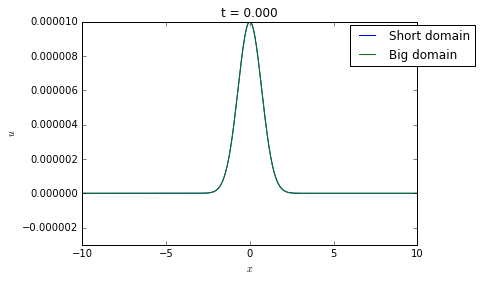

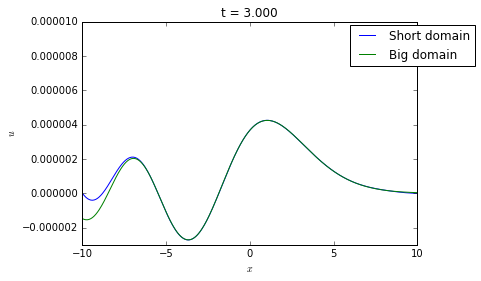

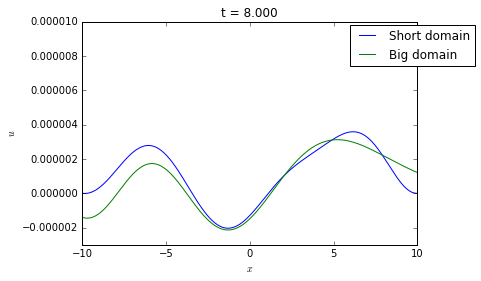

In [6]:
label = np.array(["Short domain","Big domain"])
gF.saveSnapshotNsolutions(2,0,x0,np.array([u1w,u2w]),t1,label,"$x$","$u$","figures/KdVTestCases/motivational1A",ext="png",
                         ymin = -0.000003, ymax = 0.00001)
gF.saveSnapshotNsolutions(2,int(3./dx),x0,np.array([u1w,u2w]),t1,label,"$x$","$u$","figures/KdVTestCases/motivational1B",ext="png",
                         ymin = -0.000003, ymax = 0.00001)
gF.saveSnapshotNsolutions(2,int(8./dx),x0,np.array([u1w,u2w]),t1,label,"$x$","$u$","figures/KdVTestCases/motivational1C",ext="png",
                         ymin = -0.000003, ymax = 0.00001)

In [5]:
if plotAnimations :
    gF.plotAnimationNSolutions(2,x0,np.array([u1w,u2w]),t1,xmin0,xmax0,-2.*A,2.*A,["Small domain ($u_1$)","Big domain ($u_2$)"],r'$u$')

*** Plotting animation ...


KeyboardInterrupt: 

In [ ]:
gF.plotAnimationNSolutions(1,x0,np.array([u2w-u1w]),t1,xmin0,xmax0,-2.*A,2.*A,["$u_2-u_1$"],r'$u$')

Therefore, we look for boundaries conditions that can efficiently simulate the called Transparent Boundary Conditions (TBCs), i.e., in a such a way that the solution calculated in the computational domain $\Omega$ coincides with solution of the whole-space restricted to $\Omega$.

In a more practical point of view, we want the boundaries not to have an influence on the solution, so, when the wave reaches the boundary, it will simply "exit" the domain. The following example shows a motivation for this work.

We want to solve the following problem :

\begin{equation}
    (P_1) \begin{cases}
    u_t + au_x + b(u^2)_x + u_{xxx} = 0 \ , \ \ x \in \Omega_1 = [0,L], \ \ t \in [0, t_{max}] \\
    u(x,0) = \Phi(x) \\
    u(0,t) = 0 \\
    u_x(0,t) = 0 \\
    u(L,t) = g(t)  \\ 
    \end{cases}
\end{equation}

We seek a function $g(t)$ to simulate the TBC. In order to do this, we will solve before the problem

\begin{equation}
    (P_2) \begin{cases}
    u_t + au_x + b(u^2)_x + u_{xxx} = 0 \ , \ \ x \in \Omega_2 = [0,2L], \ \ t \in [0, t_{max}] \\
    u(x,0) = \Phi(x) \\
    u(0,t) = 0 \\
    u_x(0,t) = 0 \\
    u(2L,t) = 0  \\ 
    \end{cases}
\end{equation}

and we impose $g(t) = u_2(t)$, where $u_2$ is the solution of $(P_2)$. To obtain more precise results, the two com putations are made with the same mesh size and time step.

Suppose that there is a unique solution $u_1$ to $(P_1)$. We can easily see that $u_2|_{\Omega_1}$ is also a solution of $(P_1)$. Therefore, $u_1 = u_2|_{\Omega_1}$. It justifies why our procedure works as a TBC, as shown in the following results :

In [7]:
eps = 0.001
B = 0.1
A = .00010
wvl = 10
h0min = 1.5*A/eps
h0max = B*wvl/(2.*np.pi)
h0 = 0.5*(h0min+h0max)
alpha2 = h0*h0/6.
L = 10.*wvl

### Domain 1
xc = L/2.
xmin1 = 0
xmax1 = 2*L
T = 100.
N1 = 100
dx1 = (xmax1-xmin1)/N1
x1 = kdv.discretizeSpace(xmin1,xmax1,dx1)
print(dx1)

u = np.zeros_like(x1)
u = A*np.exp(-(x1-xc)**2/(2.*wvl*wvl))

BC=np.array([0.,0.,nan,nan,0,nan,nan,nan,0,0])

uall1, tall1 = kdv.runRk4FVFourier(x1,u,t0=0,tmax=T,a=1,b=1,bc=BC,periodic=0, vardt = False)

xm = N1/2
uexact = np.zeros((tall1.size,10))
for i in range(10) :
    uexact[:,i] = nan
uexact[:,4] = uall1[xm-1,:]
uexact[:,0] = 0.
uexact[:,1] = 0.
#uexact[:,4] = (uall1[xm+1,:]-uall1[xm-1,:])/dx1
#uexact[:,5] = (uall1[xm+1,:] - 2.*uall1[xm,:] + uall1[xm-1,:])/(dx1*dx1)


### Domain 2
xmin2 = 0
xmax2 = L
N2 = N1*(xmax2-xmin2)/(xmax1-xmin1)
dx2 = (xmax2-xmin2)/N2
x2 = kdv.discretizeSpace(xmin2,xmax2,dx2)
print(dx2)

u = np.zeros_like(x2)
u = A*np.exp(-(x2-xc)**2/(2.*wvl*wvl))
uall2, tall2 = kdv.runRk4FVFourier(x2,u,t0=0,tmax=T,a=1,b=1,periodic=0, bc=uexact, constantBC = False, vardt = False)

uref = uall1[0:xm+1,:]
uerr,errNorm,errBoundary, mn, mb = kdv.computeError(x2,uall2,uref)

#kdv.plotError(x2,uall2,uerr,errNorm,errBoundary,tall2,xmin2,xmax2,-2.*A,2.*A)

2.0

*** Computing solution ...
*** End of computation ***
2.0

*** Computing solution ...
*** End of computation ***


In [ ]:
if plotAnimations :
    gF.plotAnimationNSolutions(2,x2,np.array([uall2,uerr]),tall2,xmin2,xmax2,-2.*A,2.*A,[r'$u_1$',r'$u_1-u_2$'],ylabel=" ")

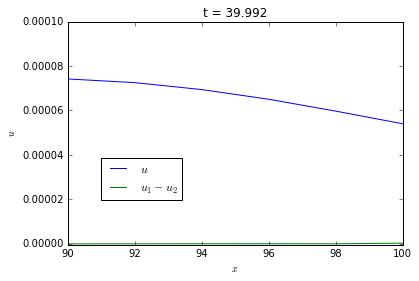

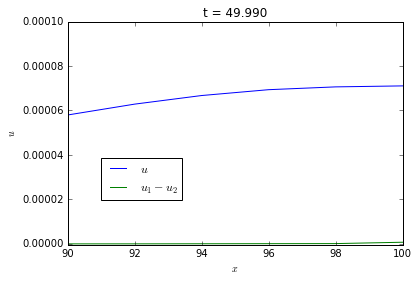

In [8]:
label = np.array(["$u$","$u_1-u_2$"])
it = np.argmin(np.absolute(tall2-40.))
gF.saveSnapshotNsolutions(2,it,x2,np.array([uall2,uerr]),tall2,label,"$x$","$u$","figures/KdVTestCases/motivational2A",ext="png",xmin=90.,xmax=100., legloc=(0.1,0.2))
it = np.argmin(np.absolute(tall2-50.))
gF.saveSnapshotNsolutions(2,it,x2,np.array([uall2,uerr]),tall2,label,"$x$","$u$","figures/KdVTestCases/motivational2B",ext="png",xmin=90.,xmax=100., legloc=(0.1,0.2))

## Robin boundary conditions to simulate TBCs

Although the motivating result presented in the above example, we cannot apply this procedure in "real-life" computations. In fact, computing the solution in a larger domain and using it as exact solution is only a trick, which has no practical interest. Therefore, we want to determinate approximations for a TBC without having a referential solution. 

The KdV will be solved in the domain $[-L,L]$ with the following boundary conditions (imposed in the resolution of the second equation of the split method):

\begin{equation}
\begin{cases}
    u(-L) = 0 \\
    u_x(-L) = 0 \\
    \alpha u(L) + \beta u_x(L) = 0,  \ \ \alpha,\beta > 0
\end{cases}
\end{equation}

In the third condition, called a Robin boundary condition, the parameters $\alpha$ and $\beta$ (or, equivalently, the parameter $\beta/\alpha$) will be optimized in order to simulate a TBC. In a first moment, we will consider Robin BCs up to the first derivative of the solution.

To find the optimal coefficients, we will test several pairs $(1,\beta/\alpha)$ (including the limits $\beta/\alpha \rightarrow 0$ and $\beta/\alpha \rightarrow \infty$, corresponding respectively to Dirichlet and Neumann BCs) and compute the error regarding to a referential solution $u_{ref}$, computed in a domain $[-2L,2L]$. Two errors will be computed, for each time step $t_n$ :

\begin{equation}
e_1^n = \sqrt{\sum_{i=0}^N{\left( u^n_i - (u_{ref})^n_i\right)^2}} 
\end{equation}

\begin{equation}
e_2^n =  u^n_N - (u_{ref})^n_N
\end{equation}

$e_2^n$ is computed in order to show that most part of the error $e_1^n$ of the entire domain occurs in the boundary.

In [4]:
## Initial solution (for all the cases)

eps = 0.001
B = 0.1
A = .00010
wvl = 10
T = 100.

L = 10.*wvl
xmin = 0.
xmax = L
N = 100
dx = (xmax-xmin)/N
x = kdv.discretizeSpace(xmin,xmax,dx)
xc = (xmax-xmin)/2.


errors = {}
errorsZoom = {}
errors2 = {}

### Referential solution

In [5]:
xminref = 0.
xmaxref = 2.*L
Nref = 2*N
dxref = (xmaxref-xminref)/Nref
xref = kdv.discretizeSpace(xminref,xmaxref,dxref)
xm = Nref/2

u = np.zeros_like(xref)
u= A*np.exp(-(xref-xc)**2/(2.*wvl*wvl))

BC=np.array([0.,0.,nan,nan,0,nan,nan,nan,0,0,0])

urefall, tref = kdv.runRk4FVFourier(xref,u,t0=0,tmax=T,a=1,b=1,bc=BC,periodic=0, vardt = False)

uref = urefall[0:xm+1,:]


*** Computing solution ...
(100, 99.979903999199962)
*** End of computation ***


In [ ]:
if plotAnimations :
    gF.plotAnimationNSolutions(1,xref,np.array([urefall]),tref,xminref,xmaxref,-2.*A,2.*A,[r'$u_1$'],ylabel=r'u_{ref}')

### Test 1 : $\frac{\beta}{\alpha} = 1.$

In [58]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1.
gama=0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gama])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors[beta/alpha] = [mN,mB]
#gF.plotAnimationNSolutions(2,x2,np.array([uall,uerr]),tall2,xmin2,xmax2,-2.*A,2.*A,[r'$u_1$',r'$u_1-u_2$'],ylabel=" ")


*** Computing solution ...
(100, 99.988733424412061)
*** End of computation ***


In [ ]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

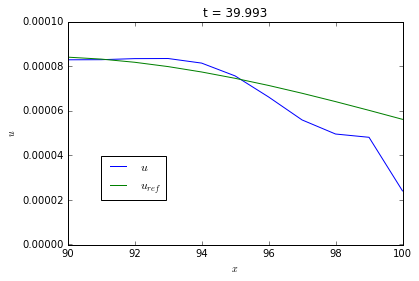

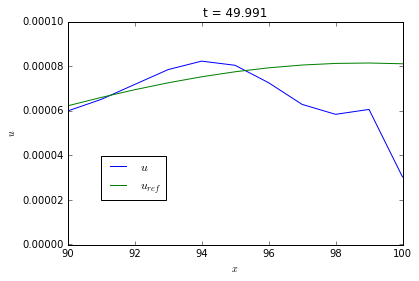

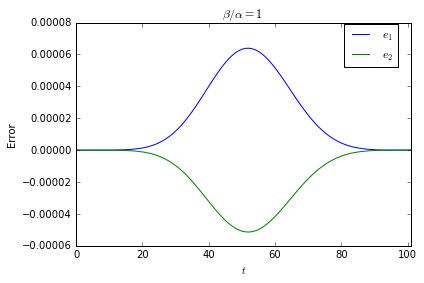

In [13]:
label = np.array(["$u$","$u_{ref}}$"])
it = np.argmin(np.absolute(tall-40.))
gF.saveSnapshotNsolutions(2,it,x,np.array([uall,uref]),tall,label,"$x$","$u$","figures/KdVTestCases/robin1A",ext="png",xmin=90.,xmax=100., legloc=(0.1,0.2))
it = np.argmin(np.absolute(tall-50.))
gF.saveSnapshotNsolutions(2,it,x,np.array([uall,uref]),tall,label,"$x$","$u$","figures/KdVTestCases/robin1B",ext="png",xmin=90.,xmax=100., legloc=(0.1,0.2))
label = np.array(["$e_1$","$e_2}$"])
gF.saveNgraphs(2,np.array([tall,tall]),np.array([errNorm,errBoundary]),label,'$t$','Error',r'$\beta/\alpha = %d$ ' %(beta/alpha),"figures/KdVTestCases/robin1Error",ext="png",
              xmin = tall[0], xmax = tall[-1]) 

### Test 2 : $\frac{\beta}{\alpha} = 0.1$

In [59]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=.1
gama=0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gama])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors[beta/alpha] = [mN,mB]


*** Computing solution ...
(100, 99.988589693484329)
*** End of computation ***


In [ ]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 3 : $\frac{\beta}{\alpha} = 10.$

In [60]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=10.
gamma = 0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors[beta/alpha] = [mN,mB]


*** Computing solution ...
(100, 99.988607208251779)
*** End of computation ***


In [ ]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

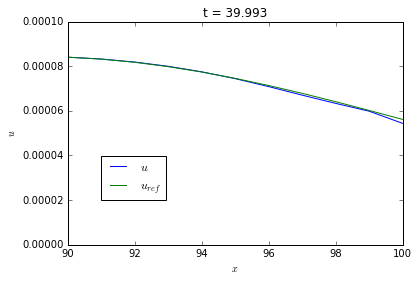

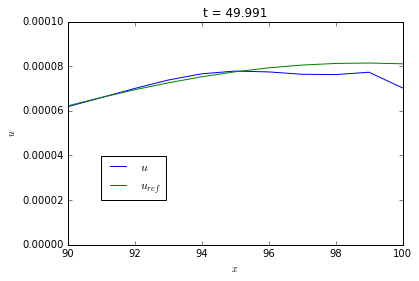

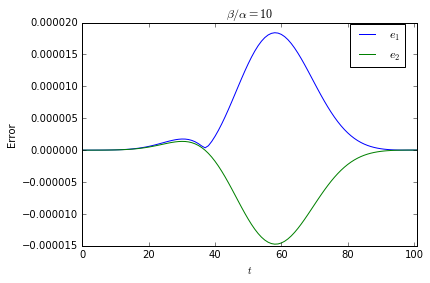

In [16]:
label = np.array(["$u$","$u_{ref}}$"])
it = np.argmin(np.absolute(tall-40.))
gF.saveSnapshotNsolutions(2,it,x,np.array([uall,uref]),tall,label,"$x$","$u$","figures/KdVTestCases/robin10A",ext="png",xmin=90.,xmax=100., legloc=(0.1,0.2))
it = np.argmin(np.absolute(tall-50.))
gF.saveSnapshotNsolutions(2,it,x,np.array([uall,uref]),tall,label,"$x$","$u$","figures/KdVTestCases/robin10B",ext="png",xmin=90.,xmax=100., legloc=(0.1,0.2))
label = np.array(["$e_1$","$e_2}$"])
gF.saveNgraphs(2,np.array([tall,tall]),np.array([errNorm,errBoundary]),label,'$t$',
               'Error',r'$\beta/\alpha = %d$ ' %(beta/alpha),"figures/KdVTestCases/robin10Error",ext="png",
              xmin = tall[0], xmax = tall[-1]) 

### Test 4 : $\frac{\beta}{\alpha} = 100.$


*** Computing solution ...
(100, 99.988466566764473)
*** End of computation ***
*** Plotting animation ...



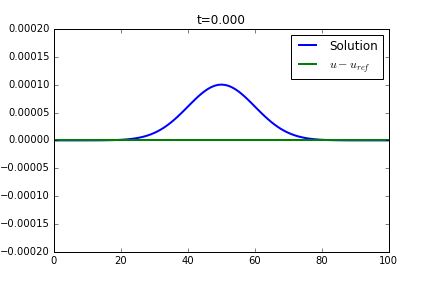
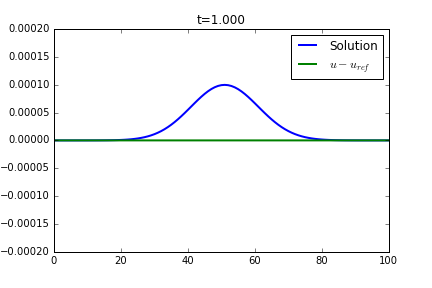
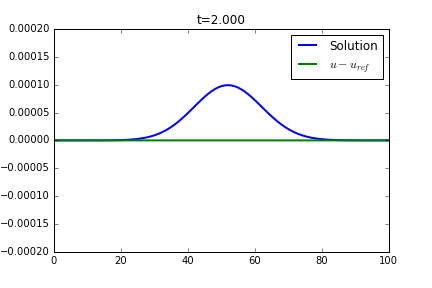
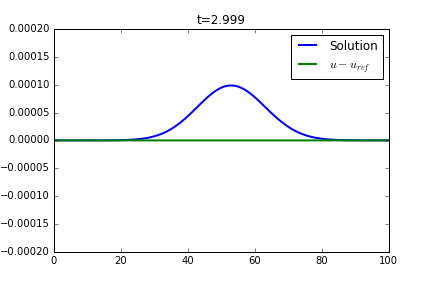
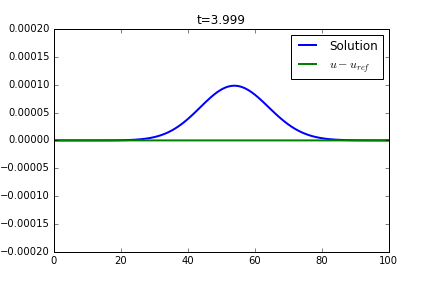
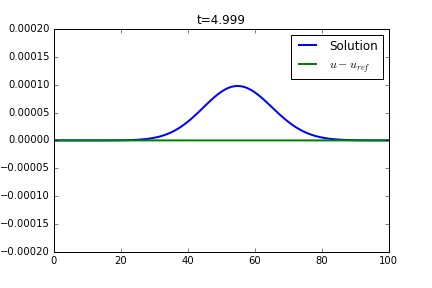
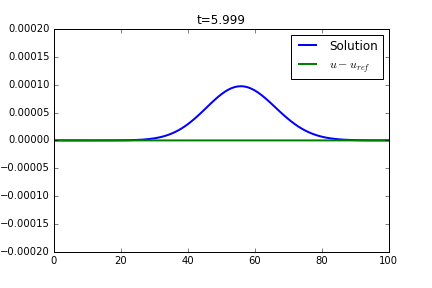
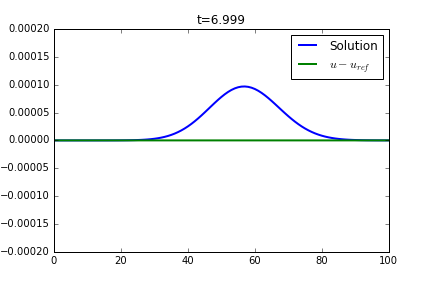
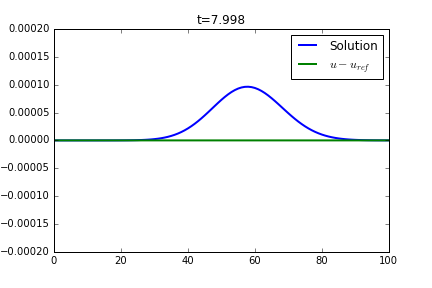
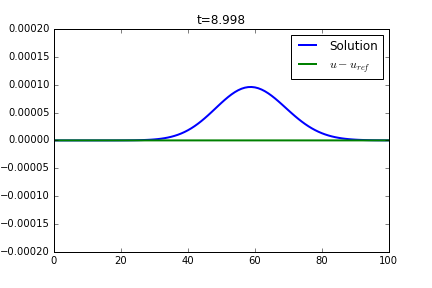
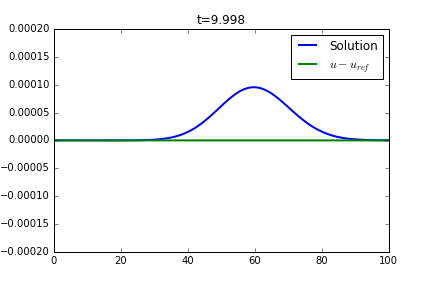
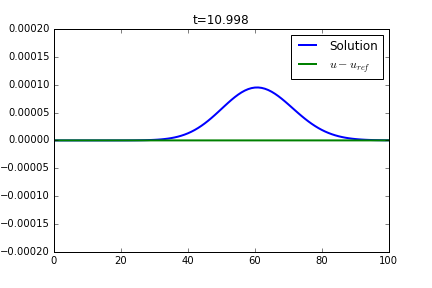
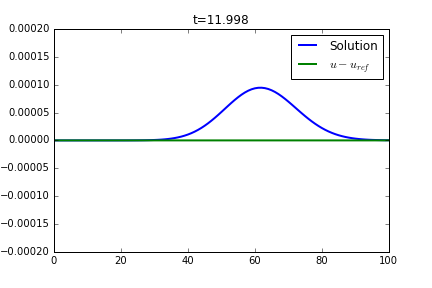
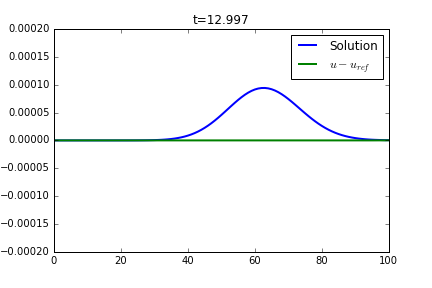
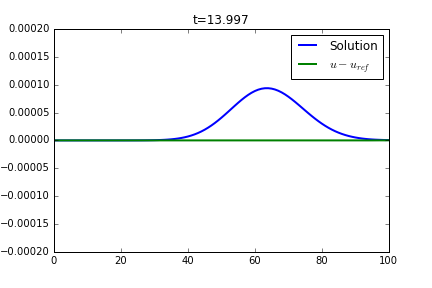
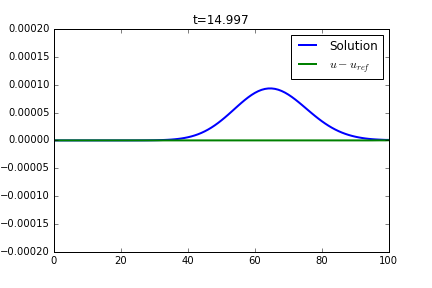
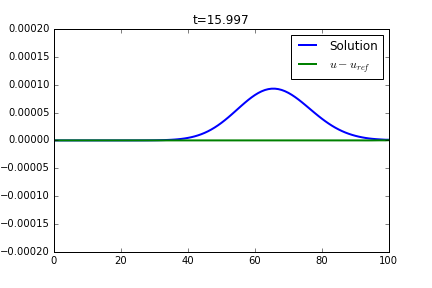
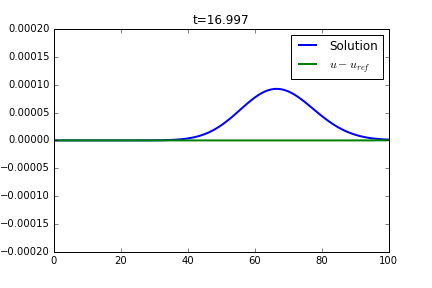
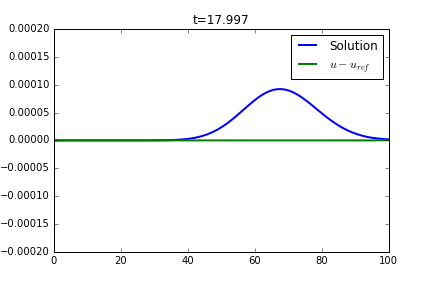
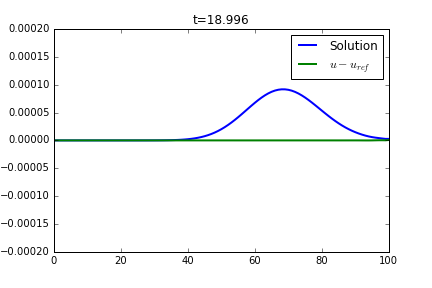
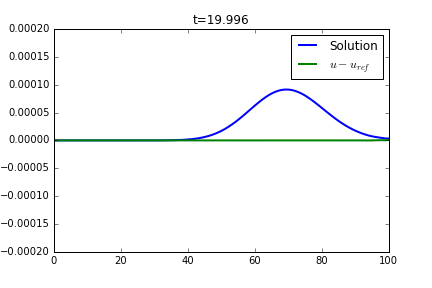
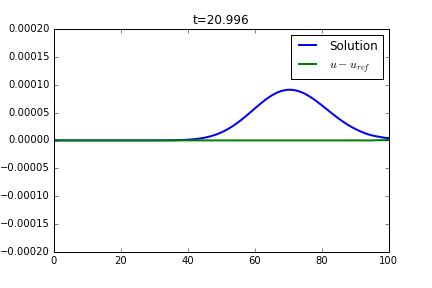
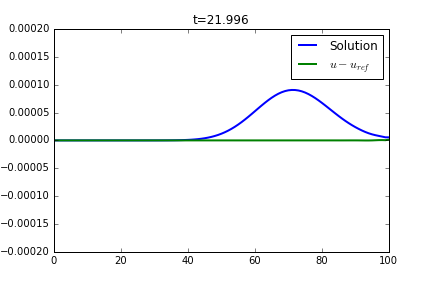
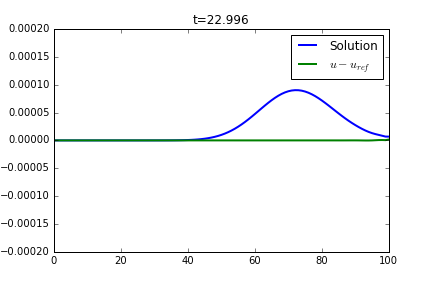
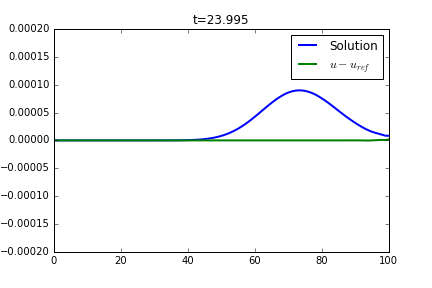
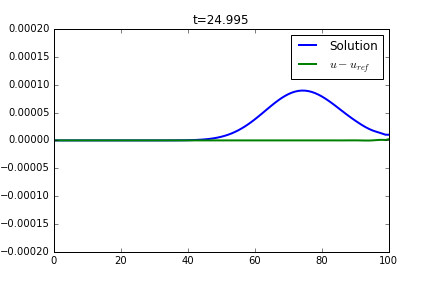
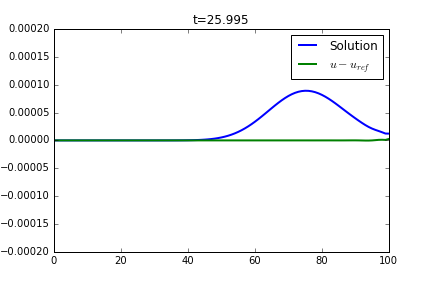
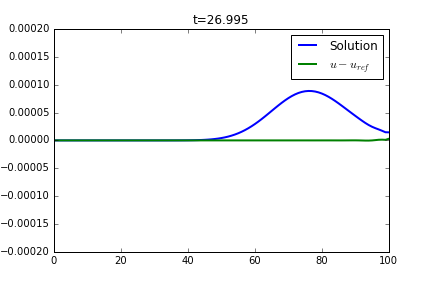
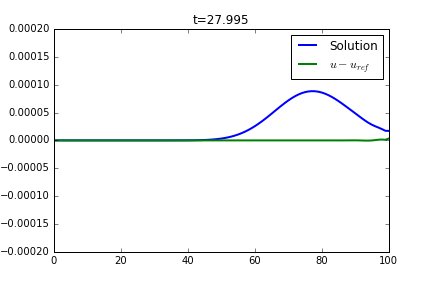
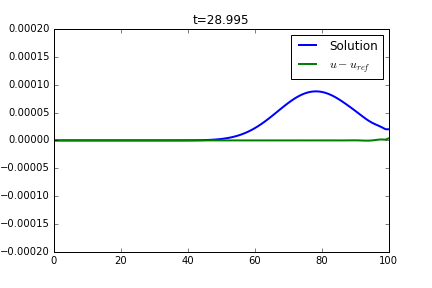
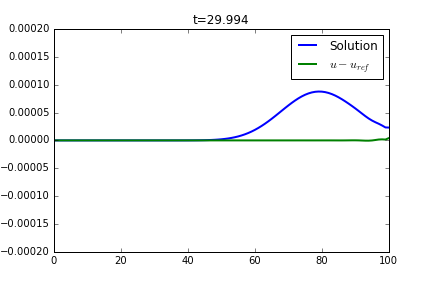
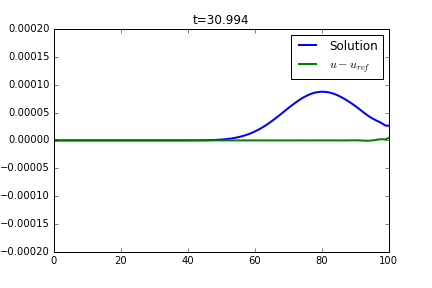
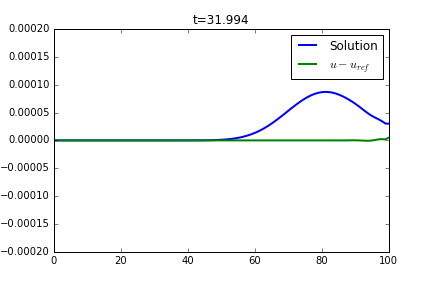
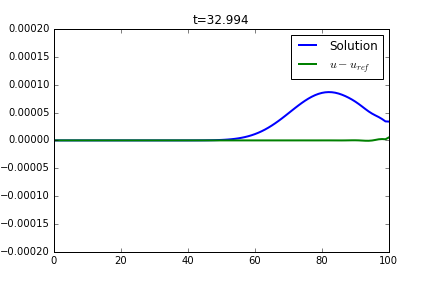
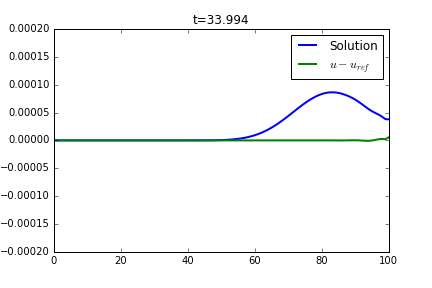
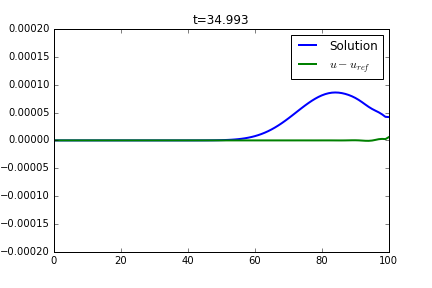
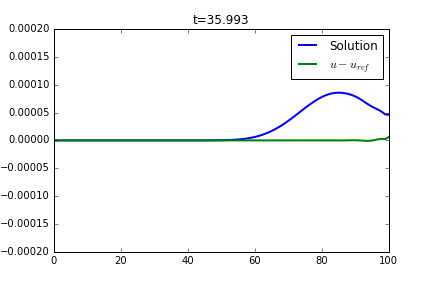
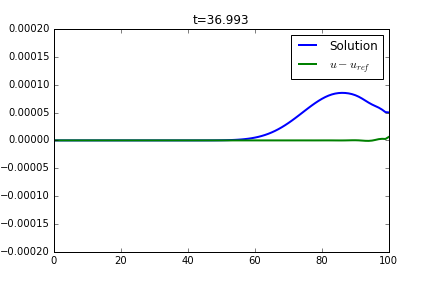
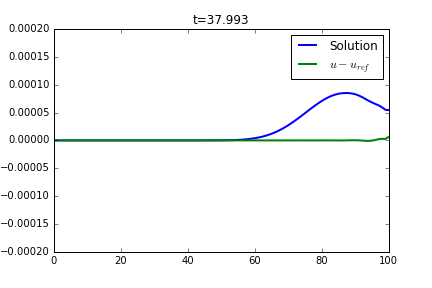
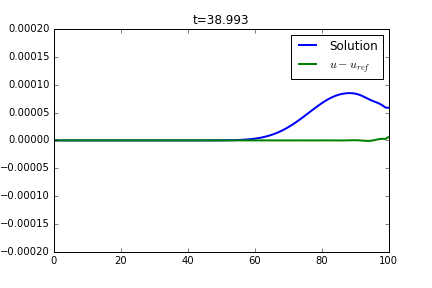
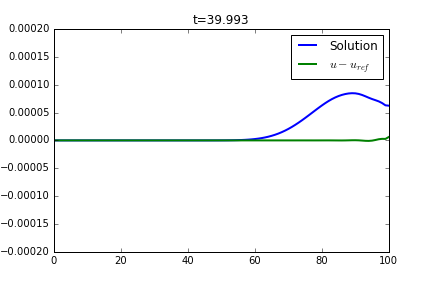
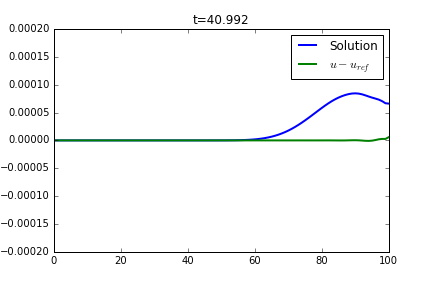
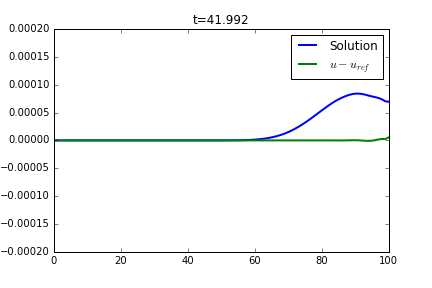
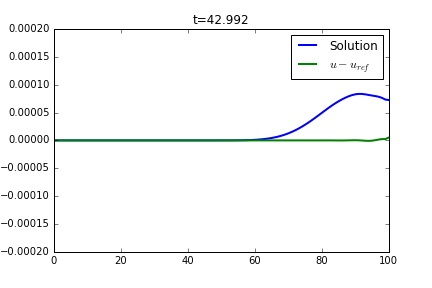
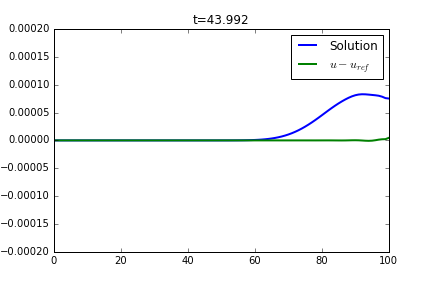
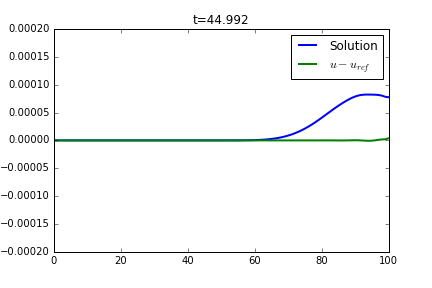
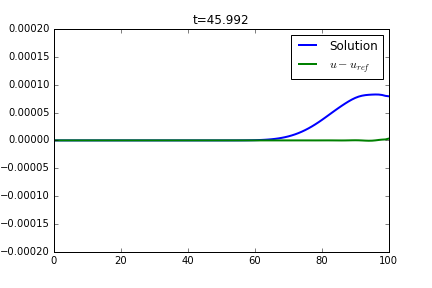
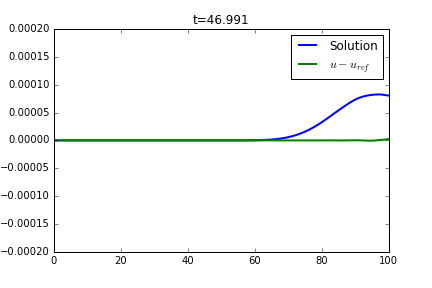
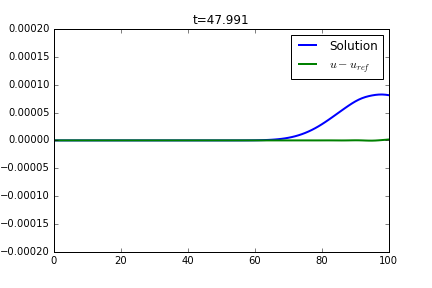
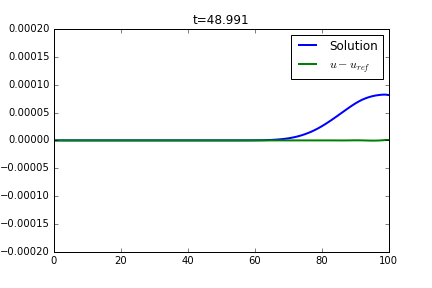
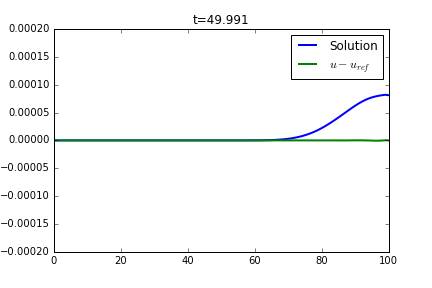
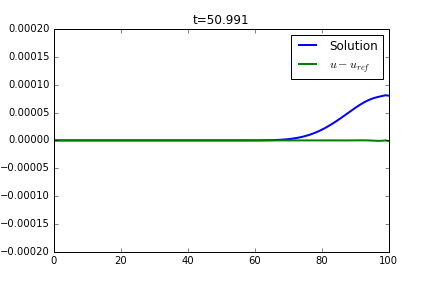
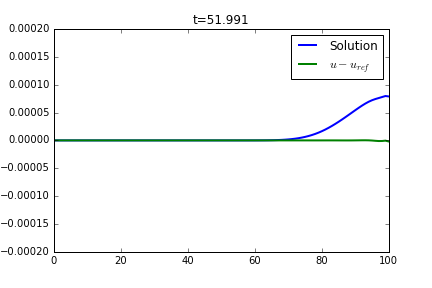
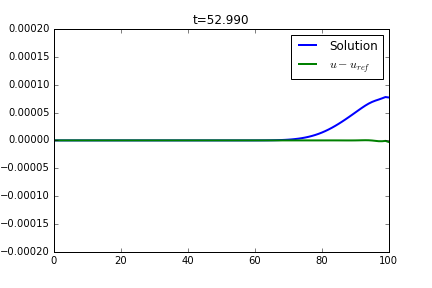
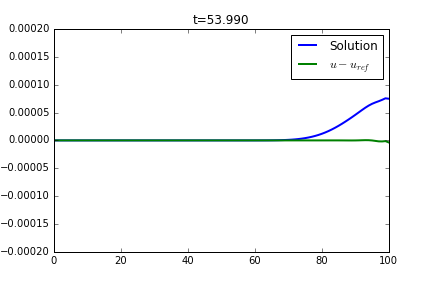
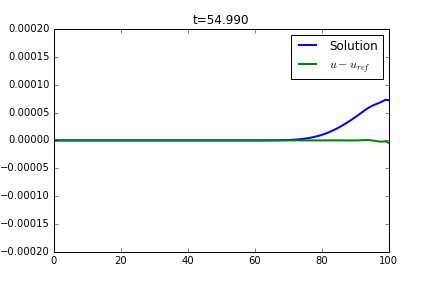
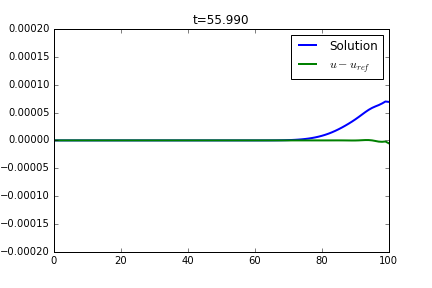
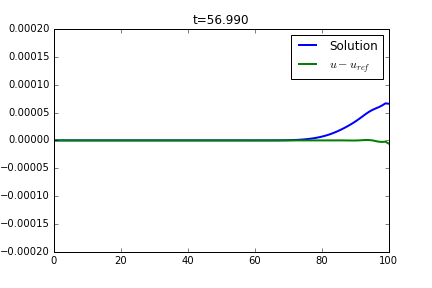
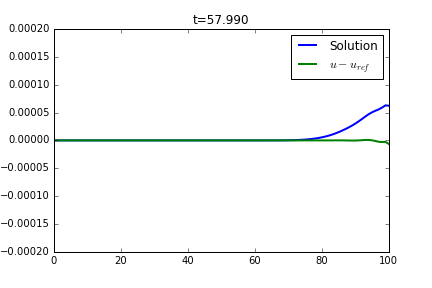
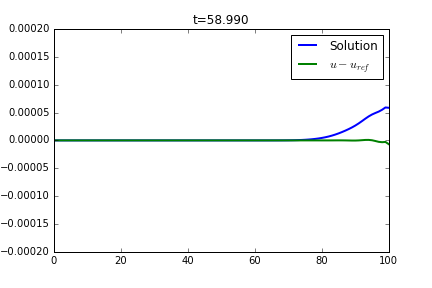
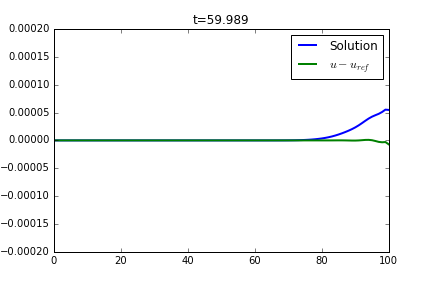
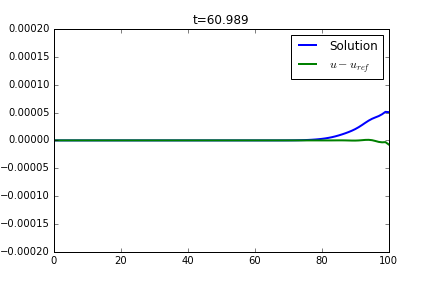
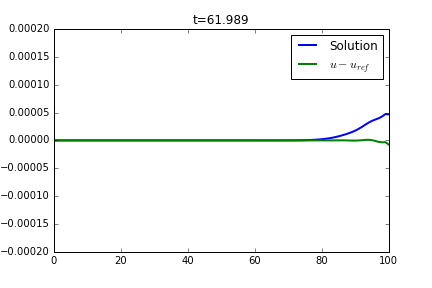
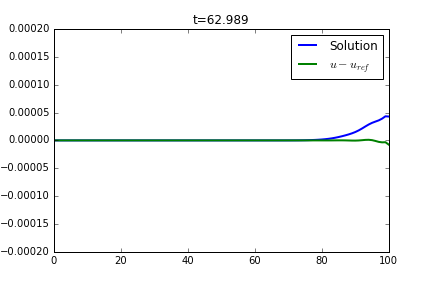
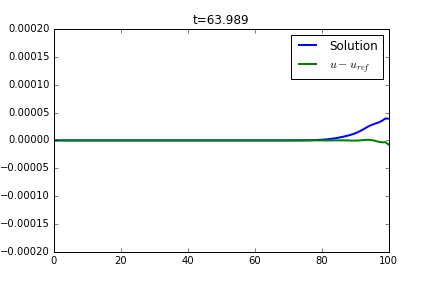
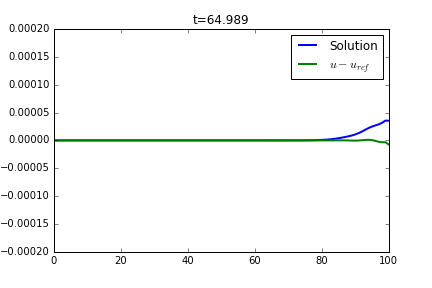
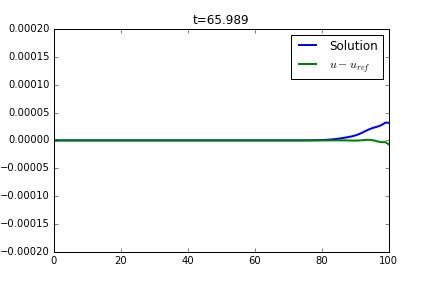
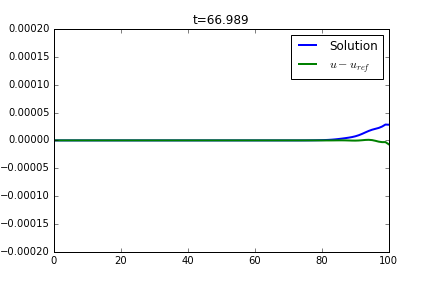
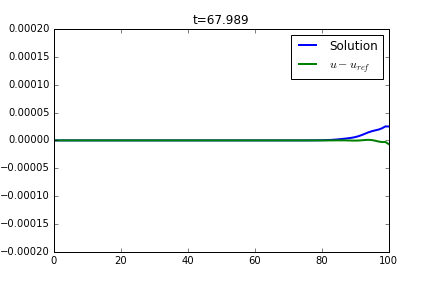
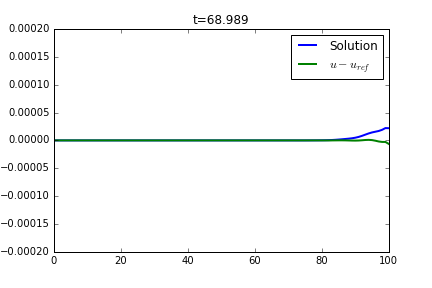
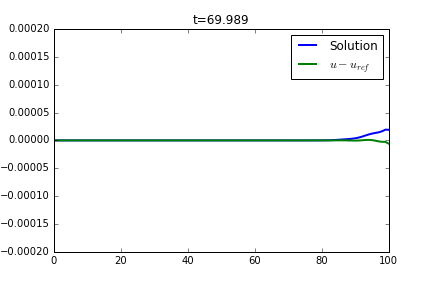
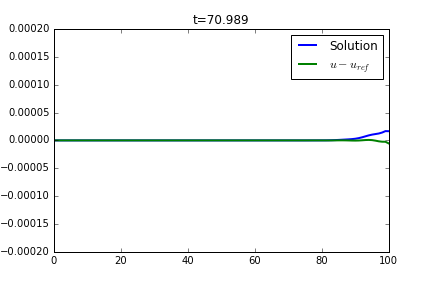
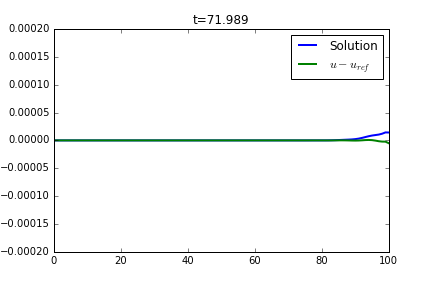
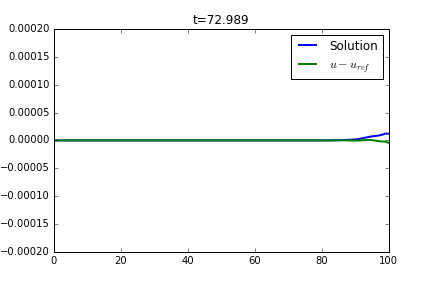
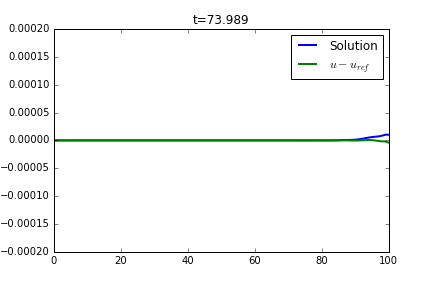
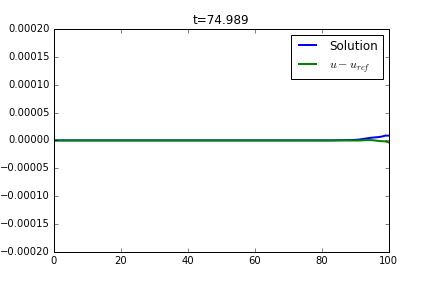
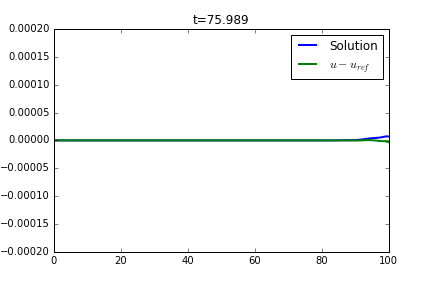
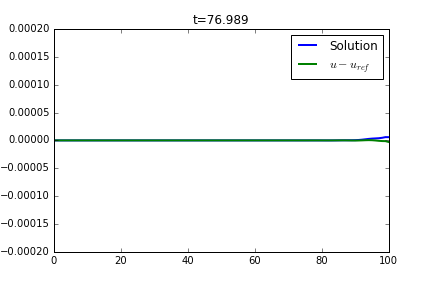
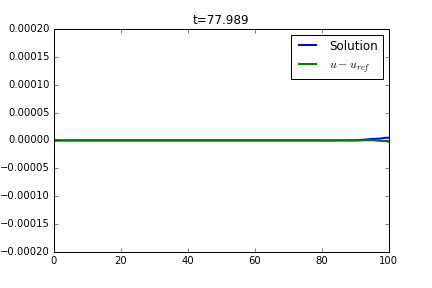
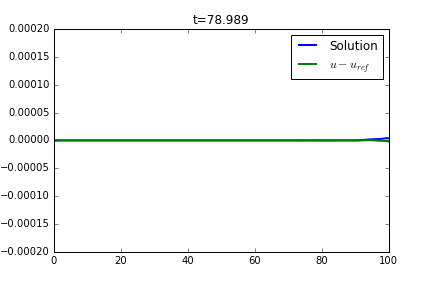
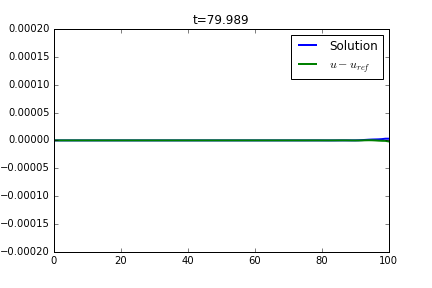
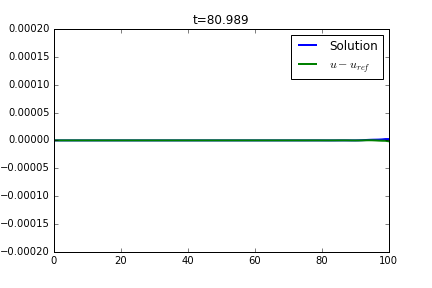
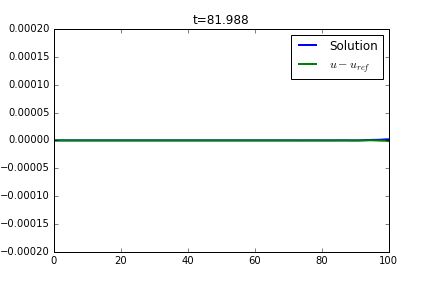
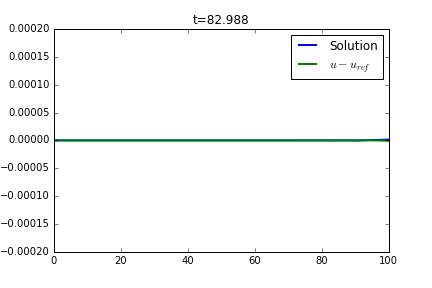
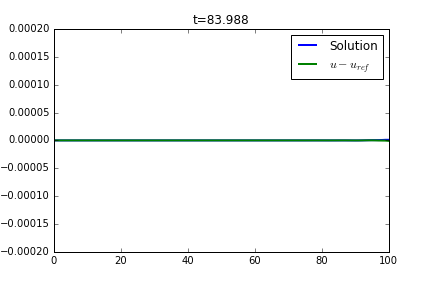
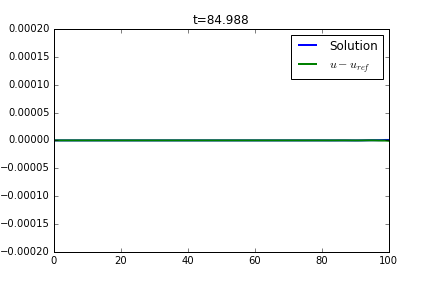
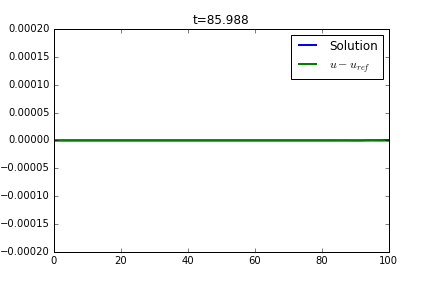
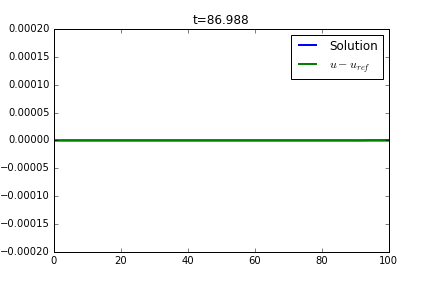
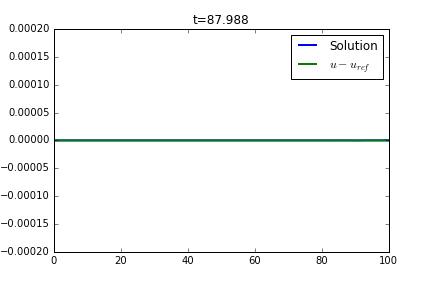
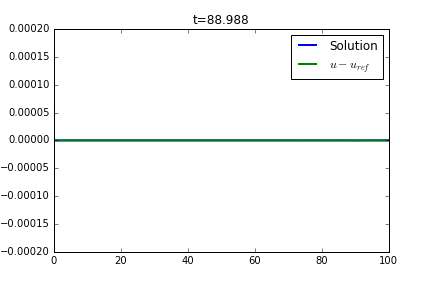
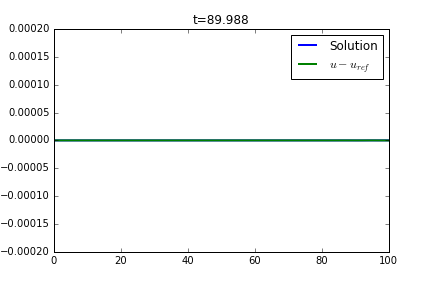
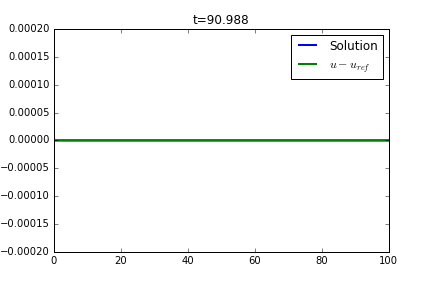
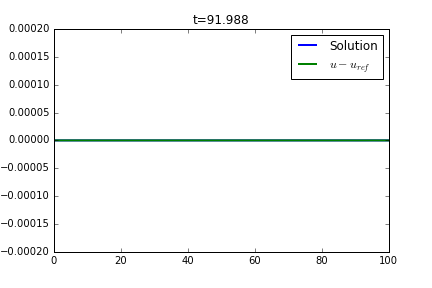
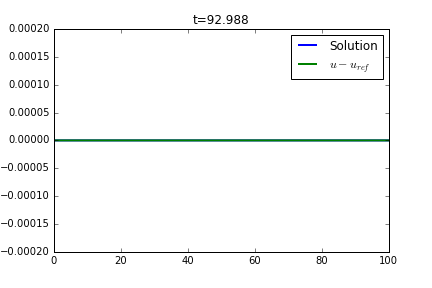
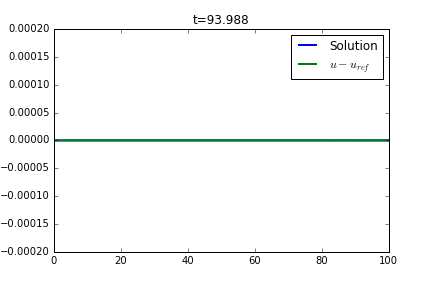
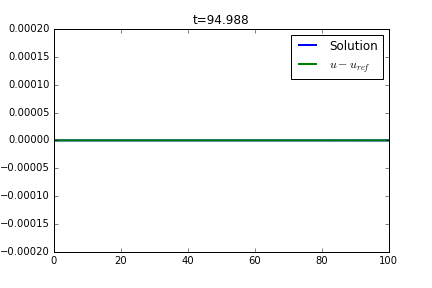
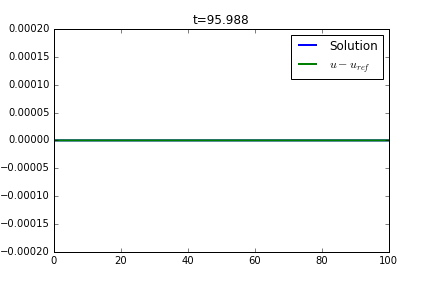
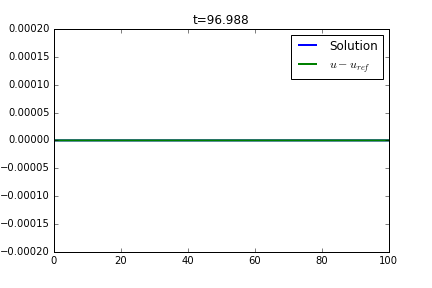
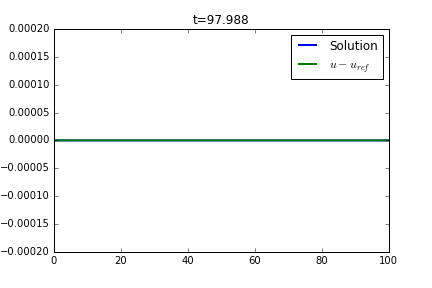
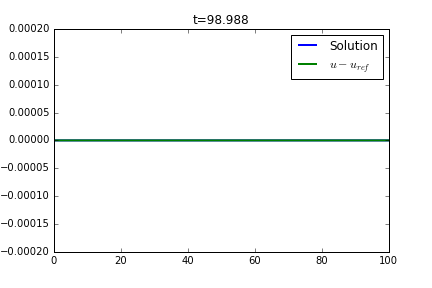
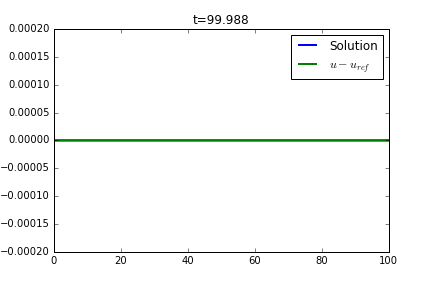
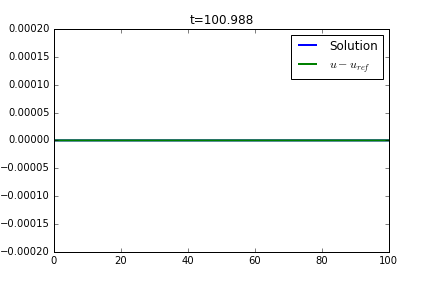

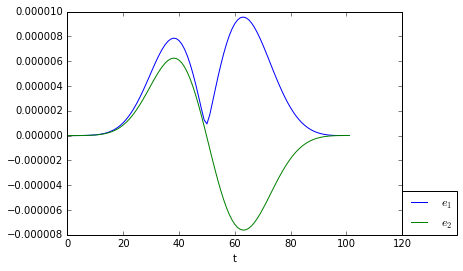

In [61]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=100.
gamma = 0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors[beta/alpha] = [mN,mB]

if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 4.5 : $\frac{\beta}{\alpha} = 10^{2.5}$


*** Computing solution ...
(100, 99.988451648372859)
*** End of computation ***
*** Plotting animation ...



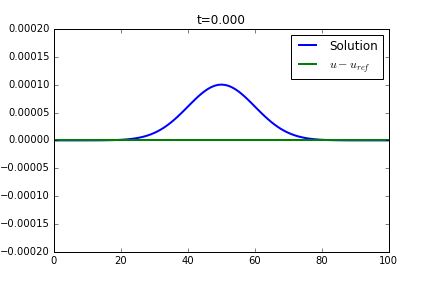
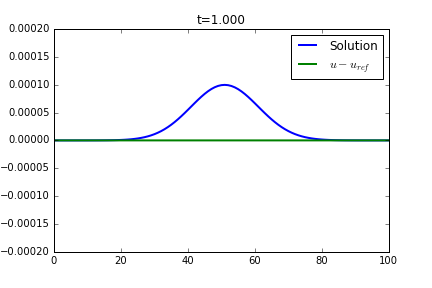
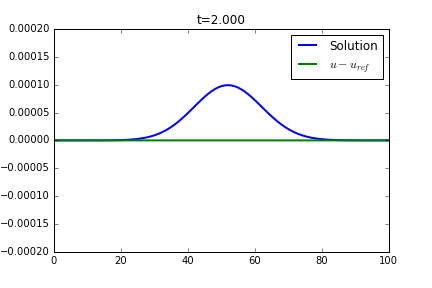
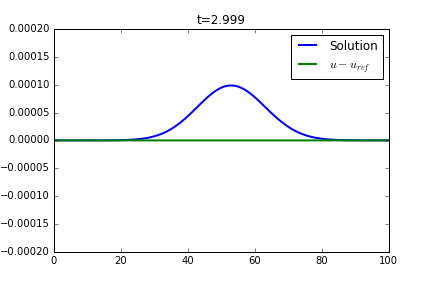
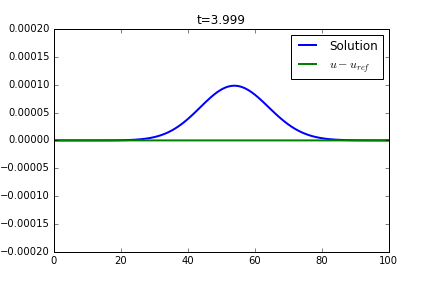
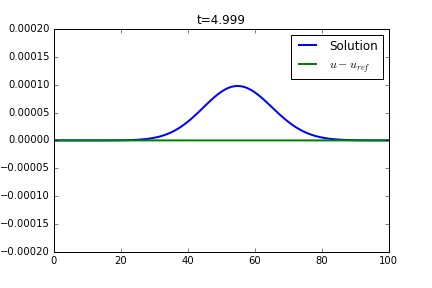
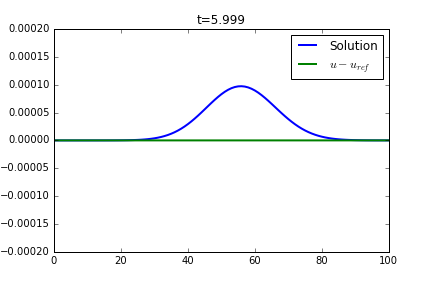
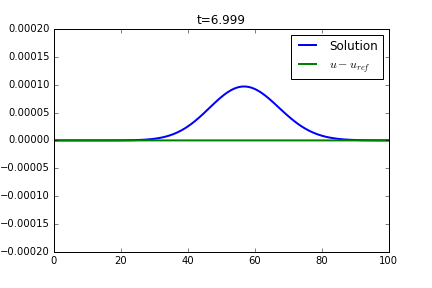
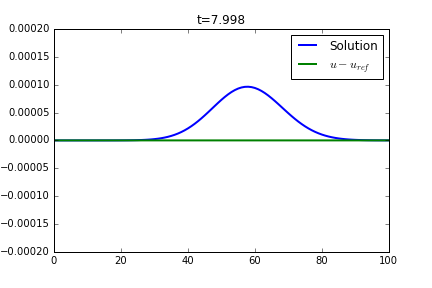
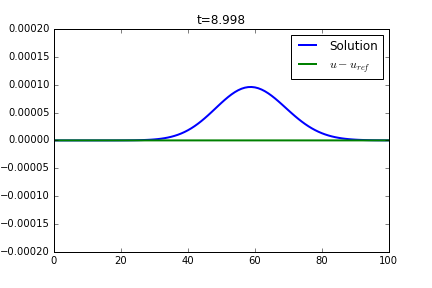
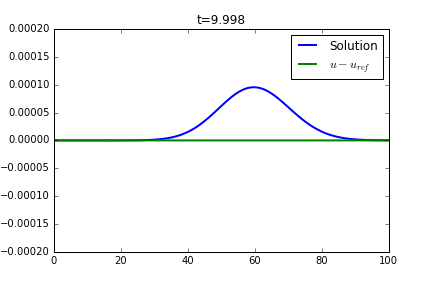
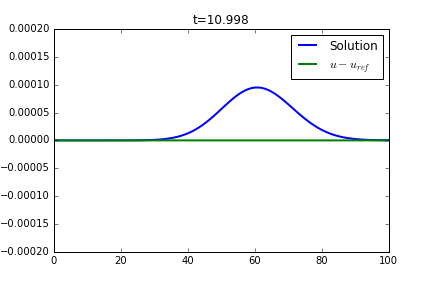
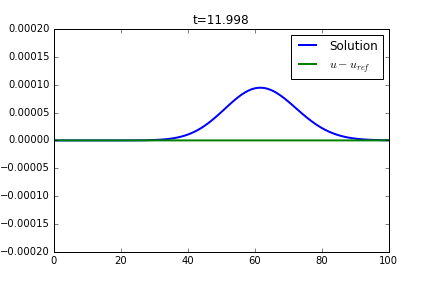
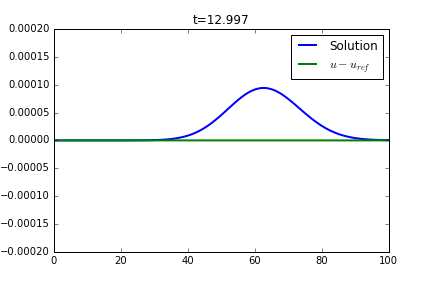
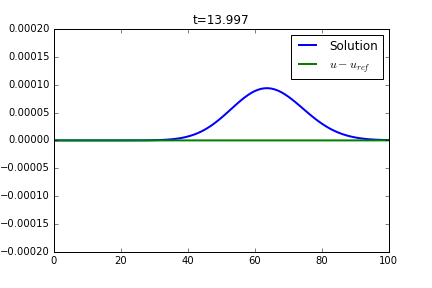
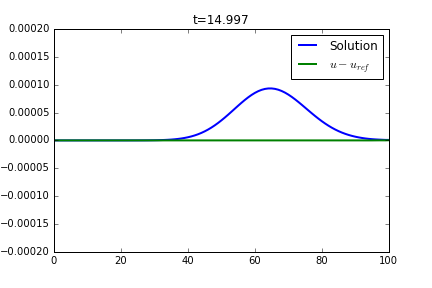
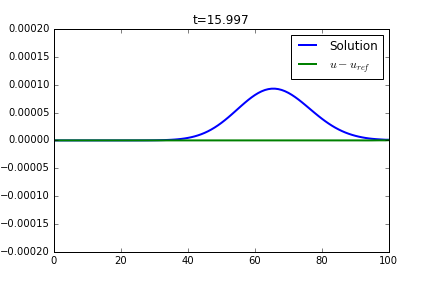
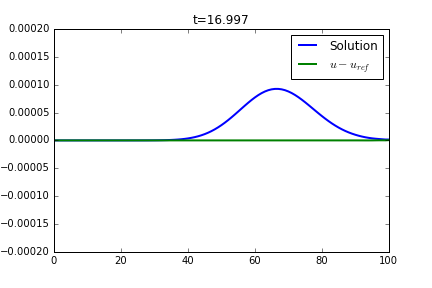
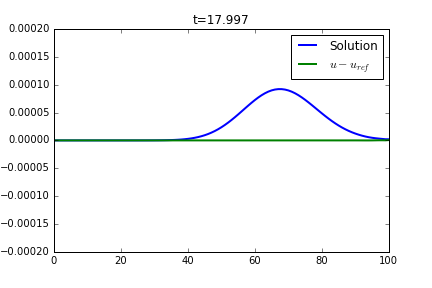
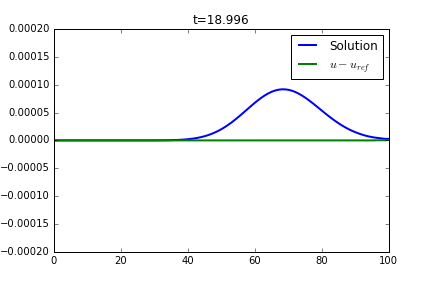
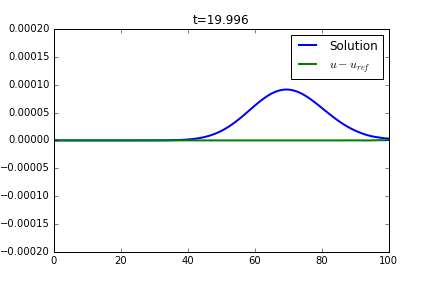
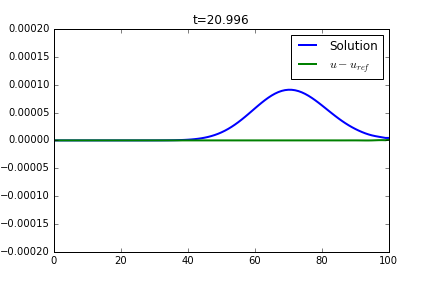
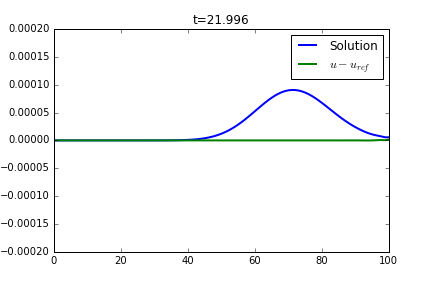
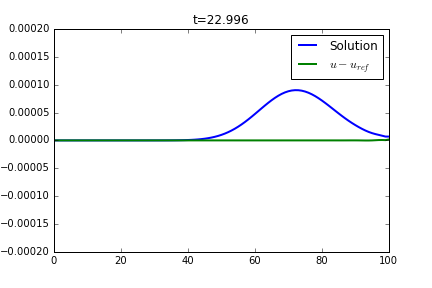
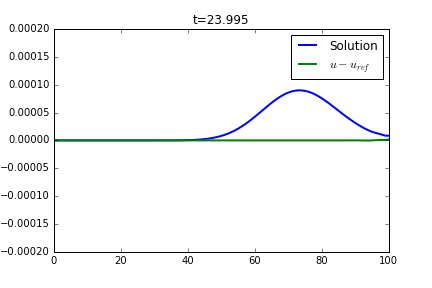
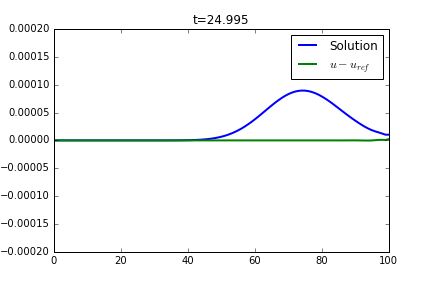
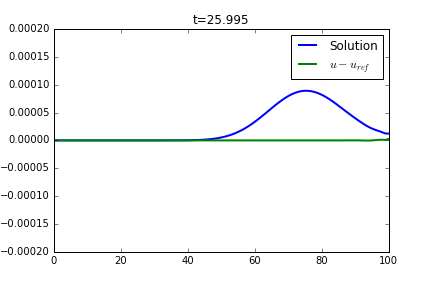
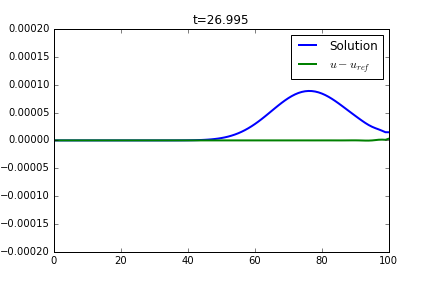
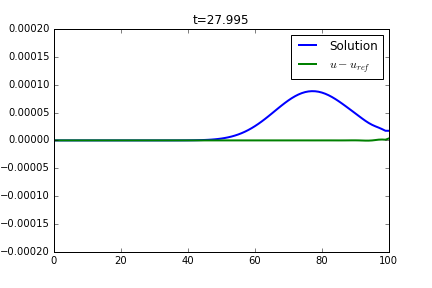
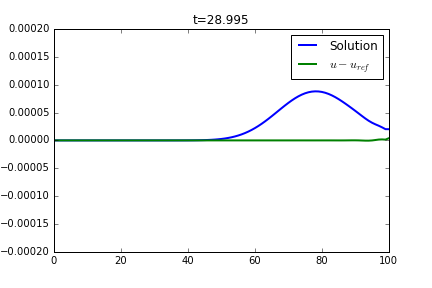
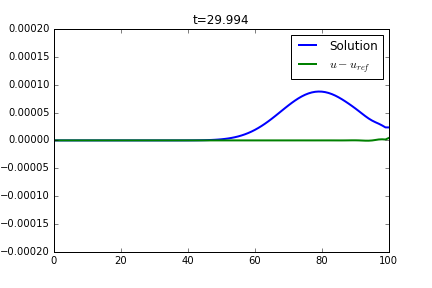
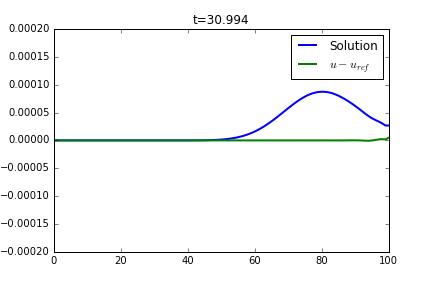
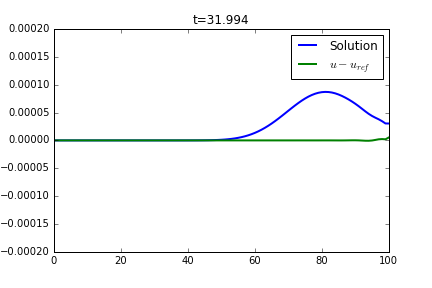
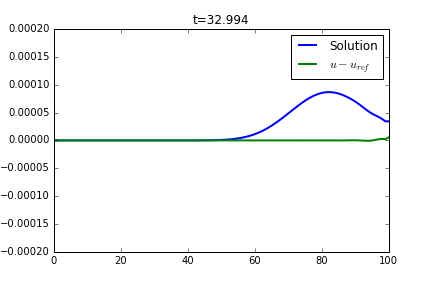
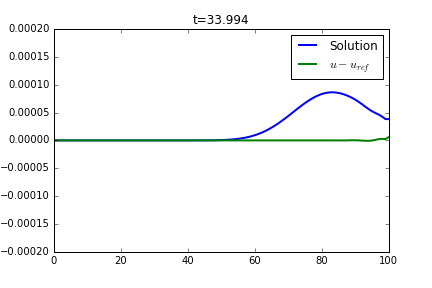
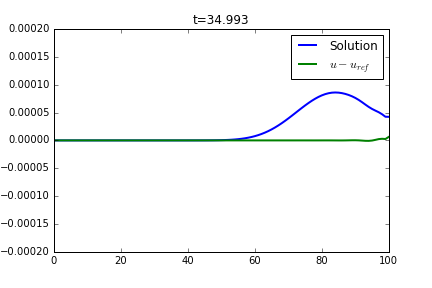
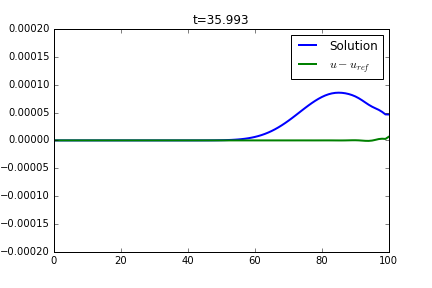
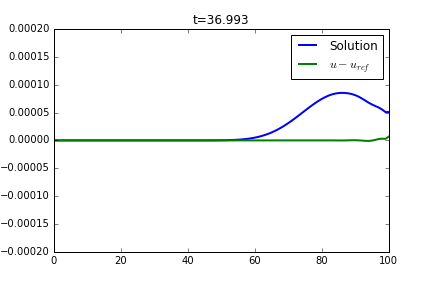
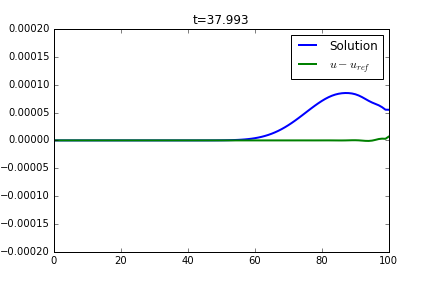
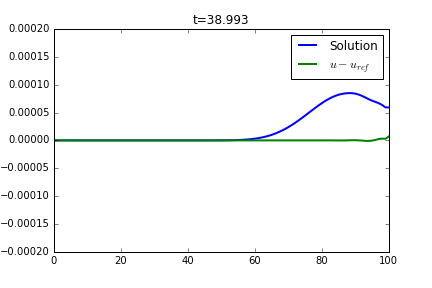
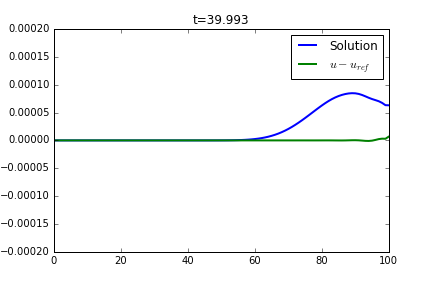
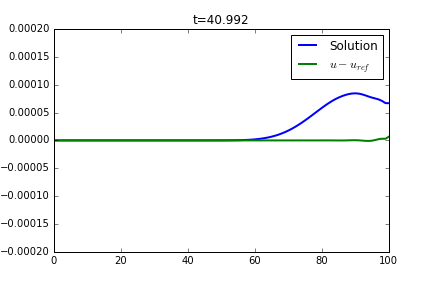
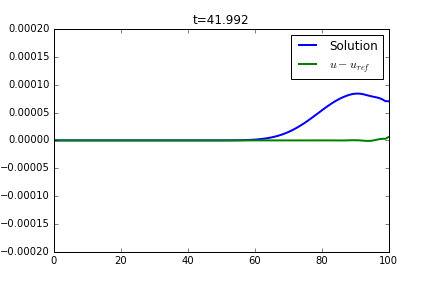
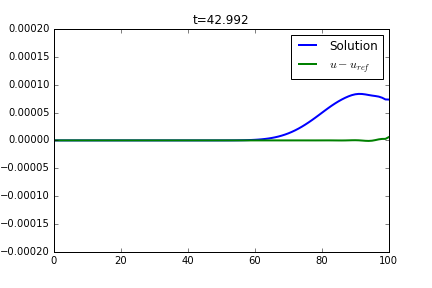
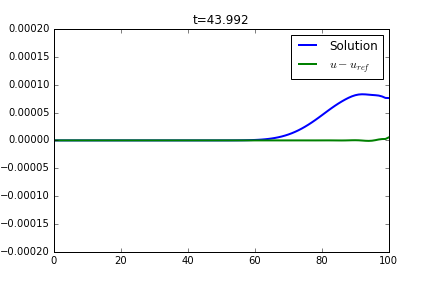
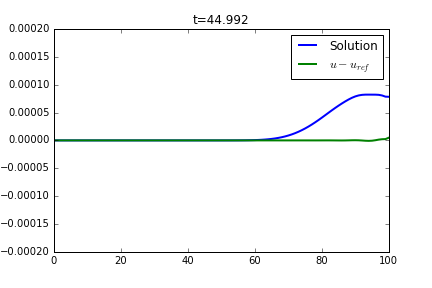
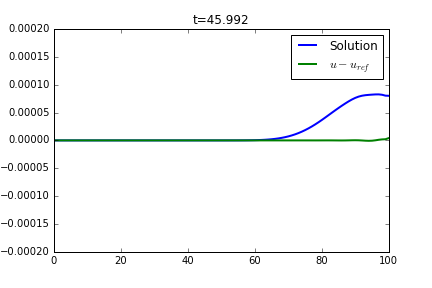
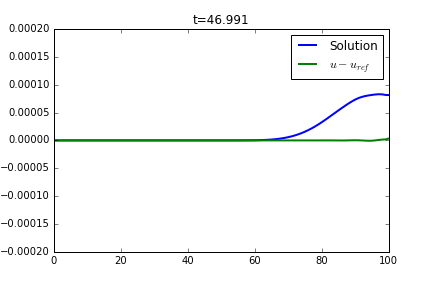
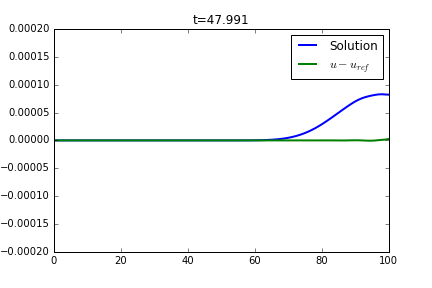
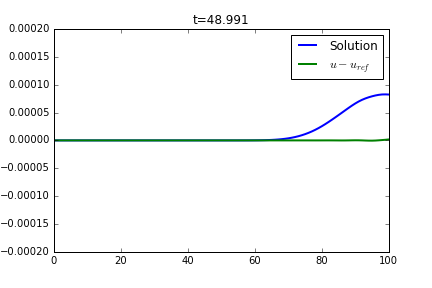
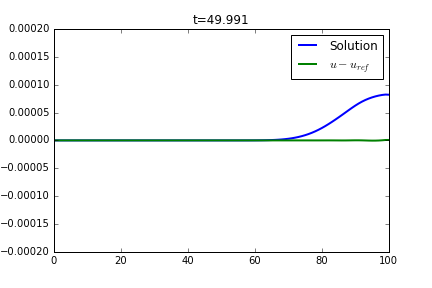
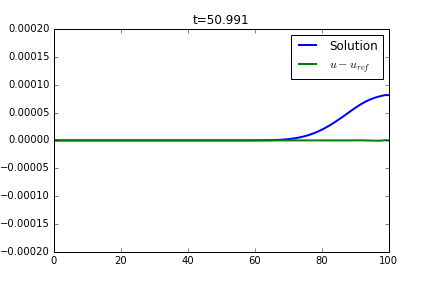
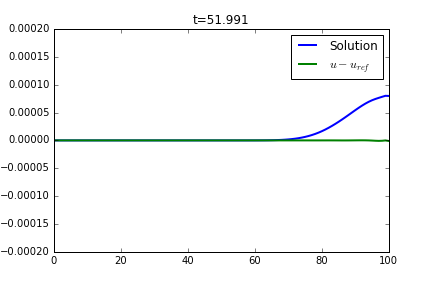
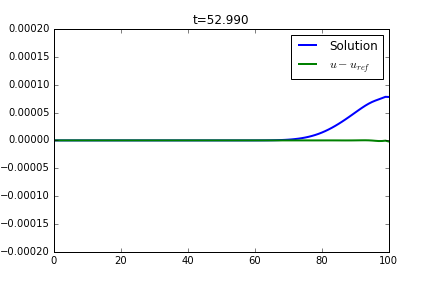
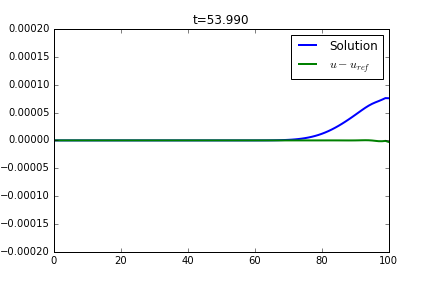
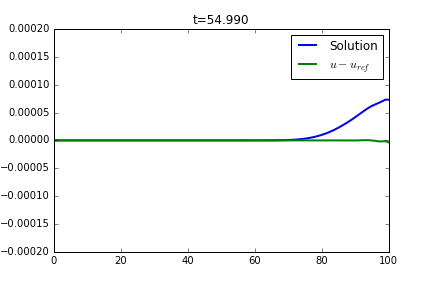
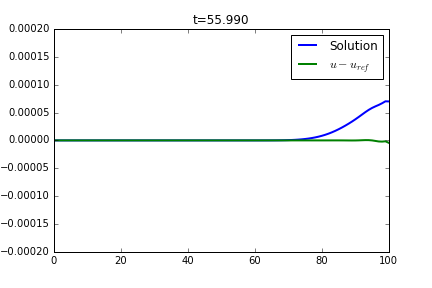
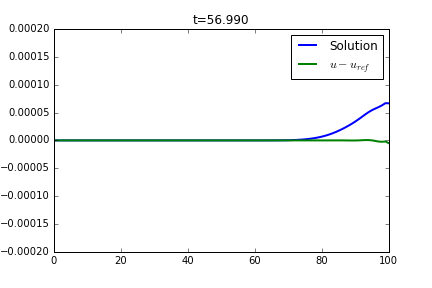
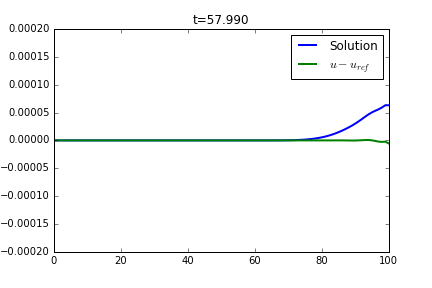
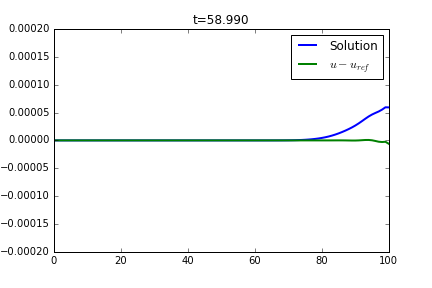
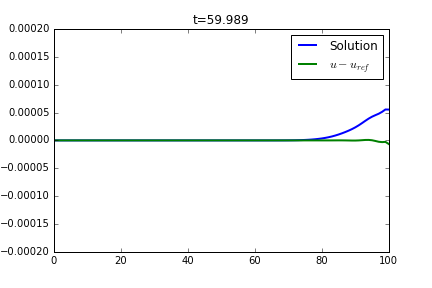
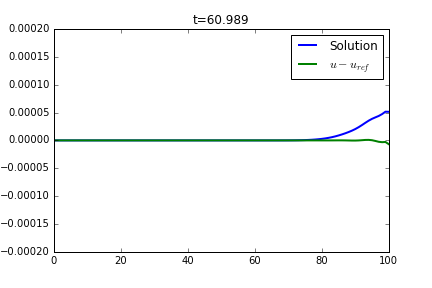
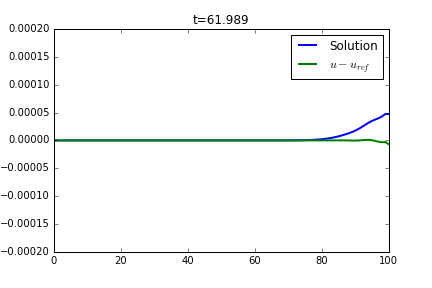
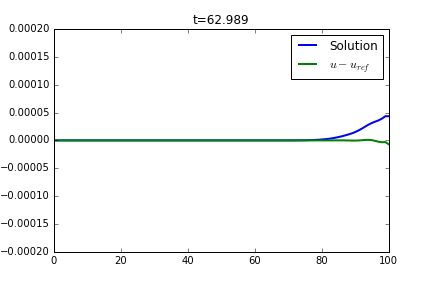
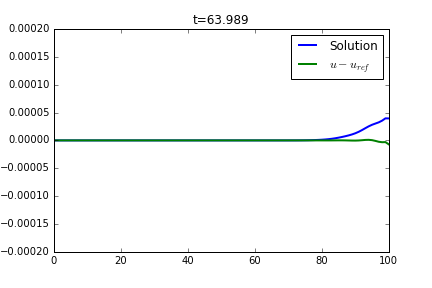
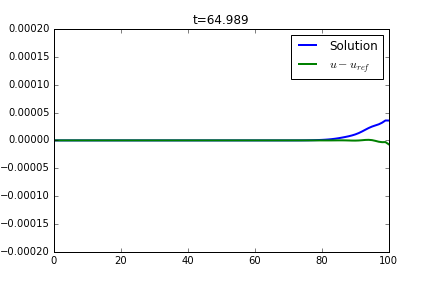
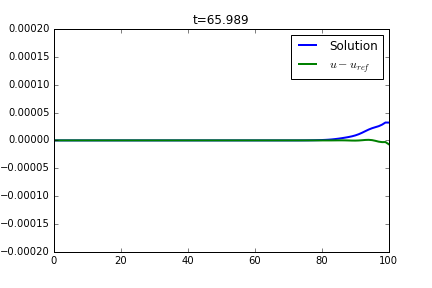
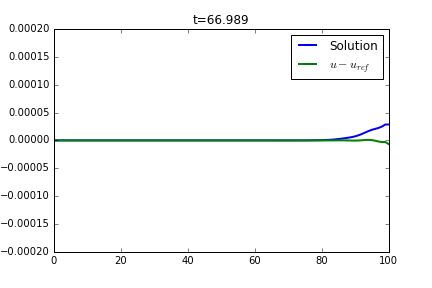
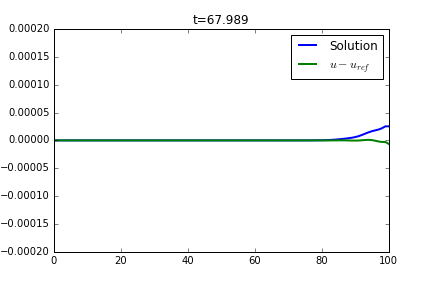
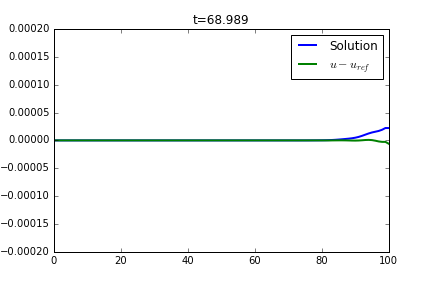
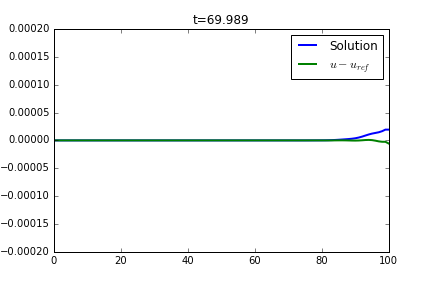
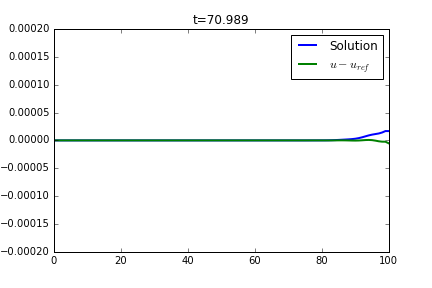
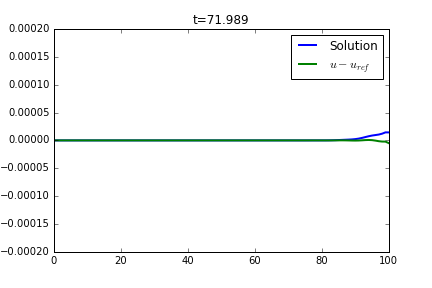
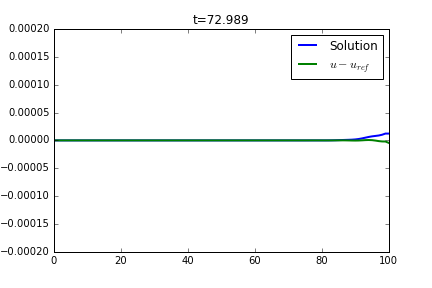
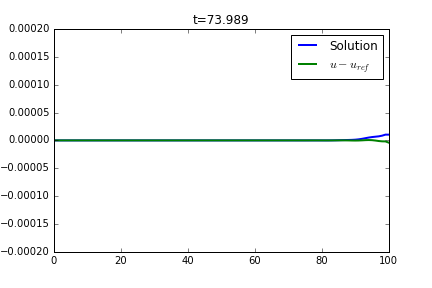
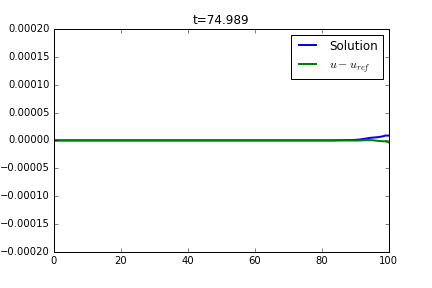
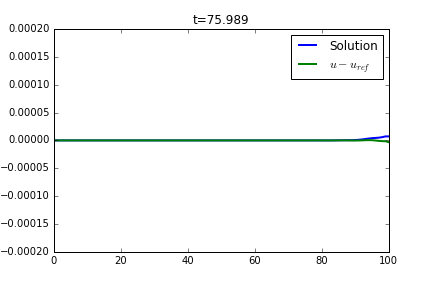
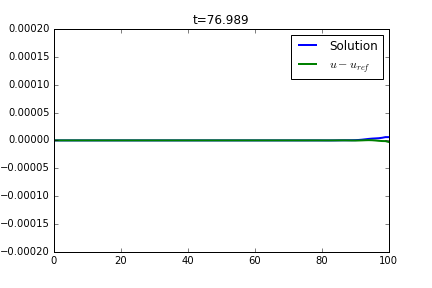
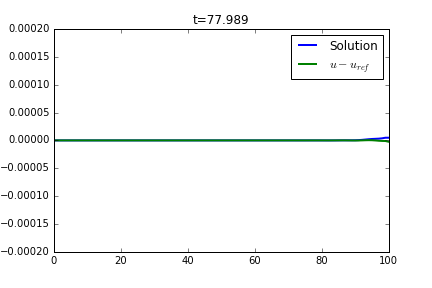
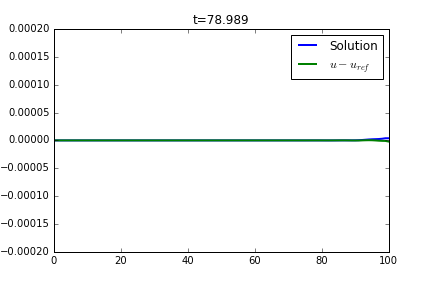
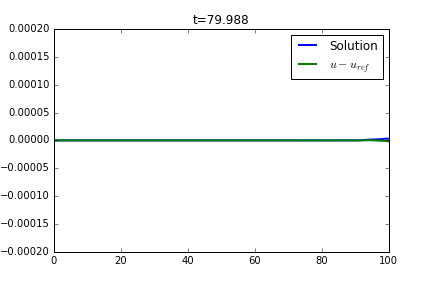
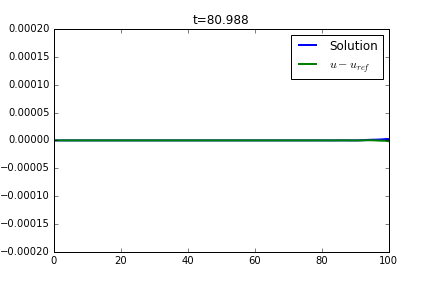
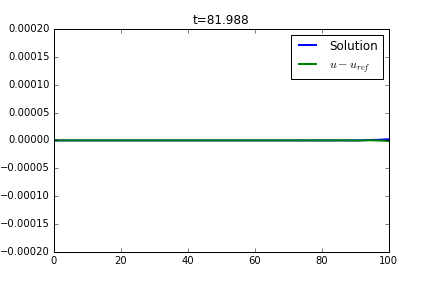
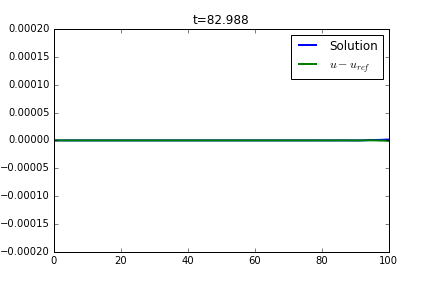
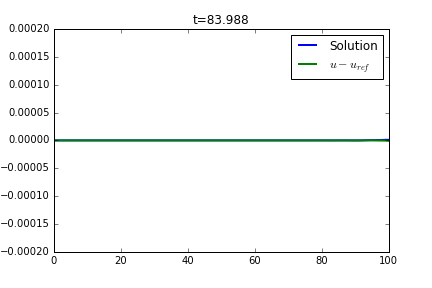
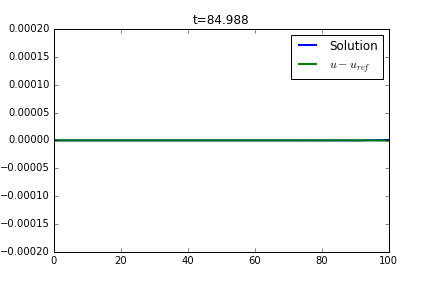
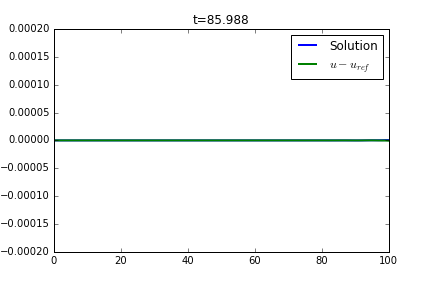
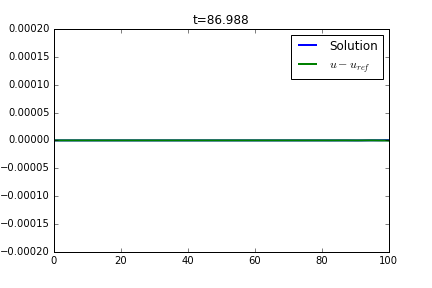
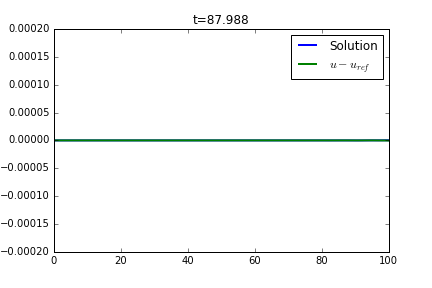
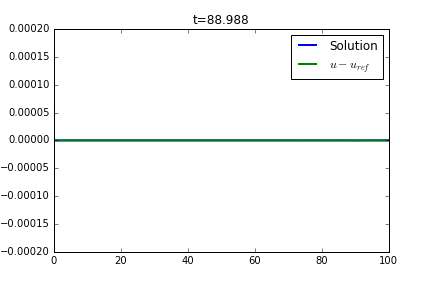
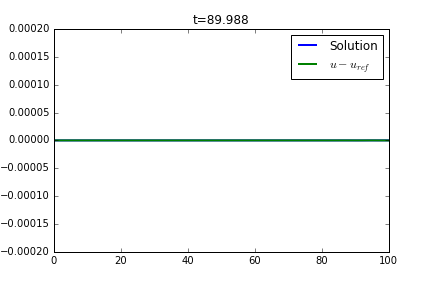
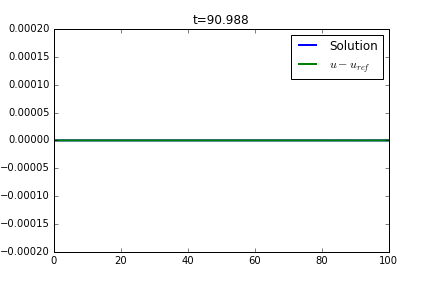
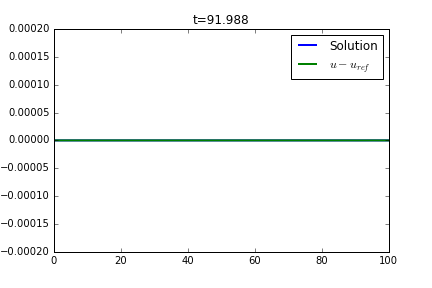
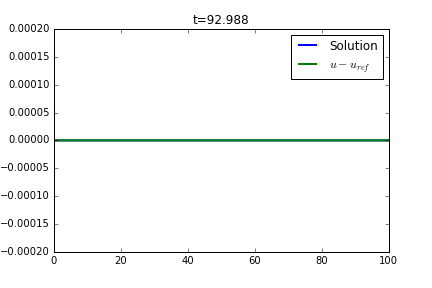
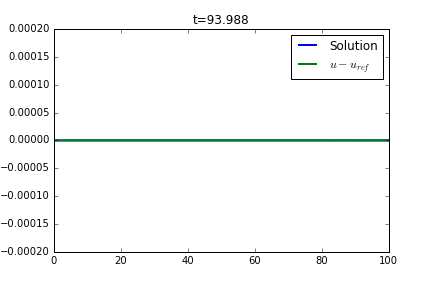
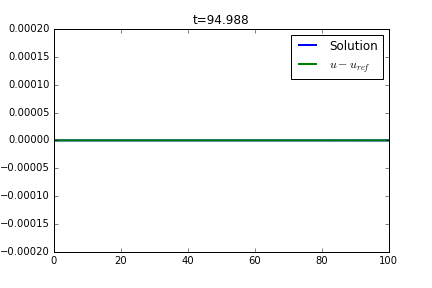
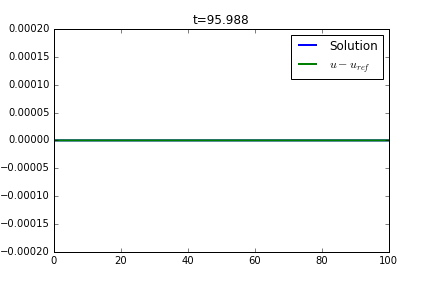
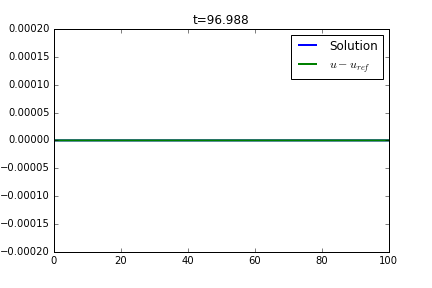
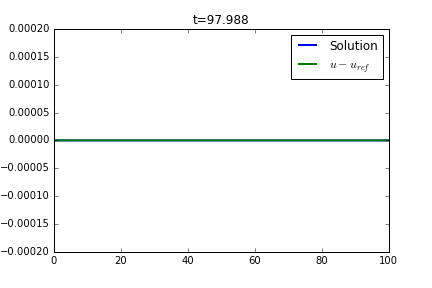
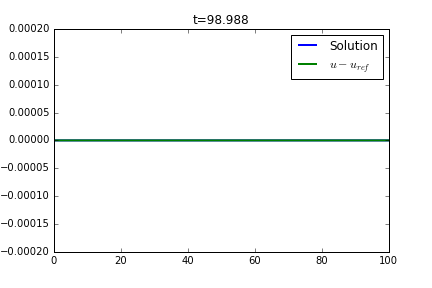
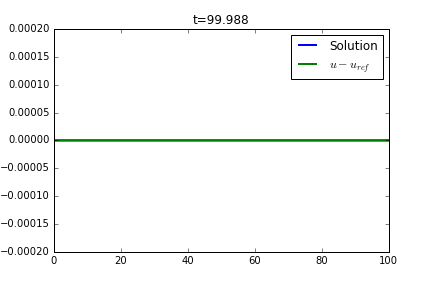
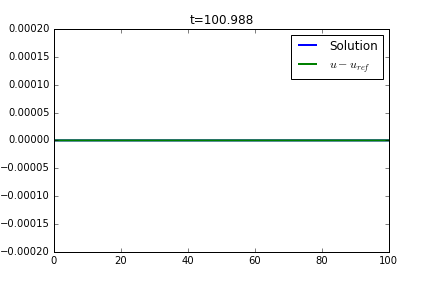

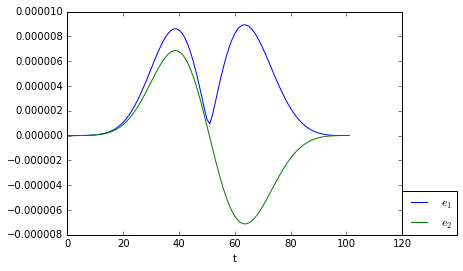

In [71]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=np.power(10.,2.5)
gamma = 0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errorsZoom[beta/alpha] = [mN,mB]

if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

In [ ]:
label = np.array(["$u$","$u_{ref}}$"])
it = np.argmin(np.absolute(tall-40.))
gF.saveSnapshotNsolutions(2,it,x,np.array([uall,uref]),tall,label,"$x$","$u$","figures/KdVTestCases/robin100A",ext="png",xmin=90.,xmax=100., legloc=(0.1,0.2))
it = np.argmin(np.absolute(tall-50.))
gF.saveSnapshotNsolutions(2,it,x,np.array([uall,uref]),tall,label,"$x$","$u$","figures/KdVTestCases/robin100B",ext="png",xmin=90.,xmax=100., legloc=(0.1,0.2))
label = np.array(["$e_1$","$e_2}$"])
gF.saveNgraphs(2,np.array([tall,tall]),np.array([errNorm,errBoundary]),label,'$t$',
               'Error',r'$\beta/\alpha = %d$ ' %(beta/alpha),"figures/KdVTestCases/robin100Error",ext="png",
              xmin = tall[0], xmax = tall[-1]) 

### Test 5 : $\frac{\beta}{\alpha} = 1000$

In [62]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors[beta/alpha] = [mN,mB]
errorsZoom[beta/alpha] = [mN,mB]


*** Computing solution ...
(100, 99.988446748886616)
*** End of computation ***


### Test 5.5 : $\frac{\beta}{\alpha} = 10^{3.5}$

In [63]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=np.power(10.,3.5)
gamma=0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errorsZoom[beta/alpha] = [mN,mB]


*** Computing solution ...
(100, 99.988445150657995)
*** End of computation ***


In [ ]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 6 : $\frac{\beta}{\alpha} = 10000$

In [64]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=10000.
gamma=0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors[beta/alpha] = [mN,mB]
errorsZoom[beta/alpha] = [mN,mB]


*** Computing solution ...
(100, 99.988444644461396)
*** End of computation ***


### Test 6.5 : $\frac{\beta}{\alpha} = 10^{4.5}$

In [65]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=np.power(10,4.5)
gamma=0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errorsZoom[beta/alpha] = [mN,mB]


*** Computing solution ...
(100, 99.988444484308573)
*** End of computation ***


In [ ]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 7 : $\frac{\beta}{\alpha} = 100000.$

In [66]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=100000.
gamma=0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors[beta/alpha] = [mN,mB]
errorsZoom[beta/alpha] = [mN,mB]


*** Computing solution ...
(100, 99.988444433655886)
*** End of computation ***


In [ ]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 8 : $\frac{\beta}{\alpha} \rightarrow \infty$

In [67]:
u = np.zeros_like(x)
#u = np.where( (x>=-.5*wvl)*(x<=.5*wvl), A, u)   #### Square wave not valid!!!!
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=0.
beta=1.
gamma=0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors[r'$\infty$'] = [mN,mB]
errorsZoom[r'$\infty$'] = [mN,mB]
print([mN,mB])


*** Computing solution ...
(100, 99.988444410229036)
*** End of computation ***
[8.9923134843018119e-06, 7.158295985918807e-06]


In [ ]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 9 : $\frac{\beta}{\alpha} = 0$

In [68]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=0.
gamma=0.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors[beta/alpha] = [mN,mB]


*** Computing solution ...
(100, 99.988560733036053)
*** End of computation ***


In [ ]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

100000.0


/Users/joaocaldas/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10


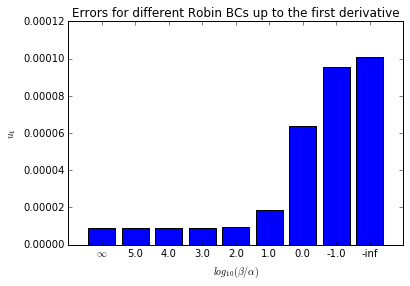

In [69]:
betas = np.array(errors.keys())
errNorm = np.array(errors.values())[:,0]
errBoundary = np.array(errors.values())[:,1]

index = np.flipud(np.argsort(betas))
index = np.roll(index,1)

betaSort = []
errNormSort = []
errBoundarySort = []

for i in range(betas.size):
    j = index[i]
    betaSort = np.append(betaSort,betas[j])
    errNormSort = np.append(errNormSort,errNorm[j])
    errBoundarySort = np.append(errBoundarySort,errBoundary[j])

xaxis = np.zeros_like(betaSort)
print(float(betaSort[1]))
for i in range(xaxis.size):
    try:
        xaxis[i] = (np.log10(float(betaSort[i])))
    except :
        xaxis[i] = betaSort[i]
        pass
    
plt.bar(range(len(betaSort)), errNormSort, align='center')
plt.xticks(range(len(betaSort)), xaxis)
plt.xlabel(r'$log_{10}(\beta/\alpha)$')
plt.ylabel(r'$u_1$')
plt.title("Errors for different Robin BCs up to the first derivative")

plt.savefig("figures/KdVTestCases/robinErrors1")
plt.show()



31622.7766017


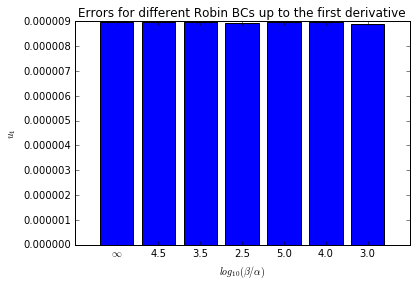

[ 0.00000899  0.00000899  0.00000895  0.00000893  0.00000899  0.00000898
  0.00000887]
{100000.0: [8.9911233458908174e-06, 7.1573388093850067e-06], '$\\infty$': [8.9923134843018119e-06, 7.158295985918807e-06], 3162.2776601683795: [8.9546966746787271e-06, 7.1280422738582118e-06], 1000.0: [8.8734903353073756e-06, 7.062730163321103e-06], 31622.776601683792: [8.9885500680855236e-06, 7.1552692329763894e-06], 10000.0: [8.9804138360475518e-06, 7.1487256028366722e-06], 316.22776601683796: [8.9251046992881222e-06, 7.1191305731285398e-06]}


In [74]:
#### ZOOM

betas = np.array(errorsZoom.keys())
errNorm = np.array(errorsZoom.values())[:,0]
errBoundary = np.array(errorsZoom.values())[:,1]

index = np.flipud(np.argsort(betas))
index = np.roll(index,1)

betaSort = []
errNormSort = []
errBoundarySort = []

for i in range(betas.size):
    j = index[i]
    betaSort = np.append(betaSort,betas[j])
    errNormSort = np.append(errNormSort,errNorm[j])
    errBoundarySort = np.append(errBoundarySort,errBoundary[j])

xaxis = np.zeros_like(betaSort)
print(float(betaSort[1]))
for i in range(xaxis.size):
    try:
        xaxis[i] = (np.log10(float(betaSort[i])))
    except :
        xaxis[i] = betaSort[i]
        pass
    
plt.bar(range(len(betaSort)), errNormSort, align='center')
plt.xticks(range(len(betaSort)), xaxis)
plt.xlabel(r'$log_{10}(\beta/\alpha)$')
plt.ylabel(r'$u_1$')
plt.title("Errors for different Robin BCs up to the first derivative")

plt.savefig("figures/KdVTestCases/robinErrors1Zoom")
plt.show()

print(errNormSort)
print(errorsZoom)

### Conclusions

The results presented above show that boundary conditions with stronger Neumann character produce better approximations to the TBC, compared to more Dirichlet-type conditions. The results for pure Neumann conditions and for Neumann with a small but non-zero Dirichlet were very close.In fact, setting the solution to zero in the boundary is a too much strong condition, and the Neumann condition captures in a more satisfactory way the smoothness of the propagating wave.

This remark motivates the following test :

## Robin BC up to the second derivative

We will repeat the tests presented above, but replacing the boundary condition in the right boundary by $\alpha u(L) + \beta u_x(L) + \gamma u_{xx}(L) = 0,  \ \ \alpha,\beta, \gamma > 0$.
The values of $\alpha$ and $\beta$ will be fixed and equal to the ones that gave the minimal error in the previous simulations ($(\alpha,\beta) = (1,1000)$)

In [60]:
errors2 = {}
errors2Zoom = {}

### Test 1 : $\frac{\gamma}{\beta} = 1$

In [61]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=1000.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2[gamma/beta] = [mN,mB]


*** Computing solution ...
(100, 99.9883037694743)
*** End of computation ***


In [62]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 2 : $\frac{\gamma}{\beta} = 10$

In [63]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=10000.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2[gamma/beta] = [mN,mB]
errors2Zoom[gamma/beta] = [mN,mB]


*** Computing solution ...
(100, 99.988190216733557)
*** End of computation ***


In [64]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 3 : $\frac{\gamma}{\beta} = 100$

In [65]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=100000.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2[gamma/beta] = [mN,mB]
errors2Zoom[gamma/beta] = [mN,mB]


*** Computing solution ...
(100, 99.988168355206597)
*** End of computation ***


In [66]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 3.5 : $\frac{\gamma}{\beta} = 10^{2.5}$

In [67]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=beta*np.power(10,2.5)

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2Zoom[gamma/beta] = [mN,mB]


*** Computing solution ...
(100, 99.988166545281089)
*** End of computation ***


### Test 4 : $\frac{\gamma}{\beta} = 1000$

In [68]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=1000000.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2[gamma/beta] = [mN,mB]
errors2Zoom[gamma/beta] = [mN,mB]


*** Computing solution ...
(100, 99.988165968152586)
*** End of computation ***


In [69]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 4.5 : $\frac{\gamma}{\beta} = 10^{3.5}$

In [70]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=beta*np.power(10,3.5)

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2Zoom[gamma/beta] = [mN,mB]


*** Computing solution ...
(100, 99.988165785166231)
*** End of computation ***


### Test 5 : $\frac{\gamma}{\beta} = 10000$

In [71]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=10000000.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2[gamma/beta] = [mN,mB]
errors2Zoom[gamma/beta] = [mN,mB]


*** Computing solution ...
(100, 99.988165727252451)
*** End of computation ***


In [72]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 5.5 : $\frac{\gamma}{\beta} = 10^{4.5}$

In [73]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=beta*np.power(10,4.5)

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2Zoom[gamma/beta] = [mN,mB]


*** Computing solution ...
(100, 99.988165708933693)
*** End of computation ***


### Test 6 : $\frac{\gamma}{\beta} = \infty$

In [74]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=0.
beta=0.
gamma=1.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2[r'$\infty$'] = [mN,mB]
errors2Zoom[r'$\infty$'] = [mN,mB]


*** Computing solution ...
(100, 99.988165700460925)
*** End of computation ***


In [75]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 7 : $\frac{\gamma}{\beta} = .1$

In [76]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=100.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2[gamma/beta] = [mN,mB]


*** Computing solution ...
(100, 99.988422183663687)
*** End of computation ***


In [77]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

### Test 8 : $\frac{\gamma}{\beta} = .01$

In [78]:
u = np.zeros_like(x)
u = A*np.exp(-(x-xc)**2/(2.*wvl*wvl))
alpha=1.
beta=1000.
gamma=10.

#BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta])
BC=np.array([0.,0.,nan,nan,nan,nan,nan,0.,alpha,beta,gamma])
uall, tall = kdv.runRk4FVFourier(x,u,t0=0,tmax=T,a=1,b=1,periodic=0,bc=BC)

uerr,errNorm,errBoundary, mN, mB = kdv.computeError(x,uall,uref)
errors2[gamma/beta] = [mN,mB]


*** Computing solution ...
(100, 99.988445297354914)
*** End of computation ***


In [79]:
if plotAnimations :
    kdv.plotSolutionError(x,uall,uerr,errNorm,errBoundary,tall,xmin,xmax,-2.*A,2.*A)

10000.0


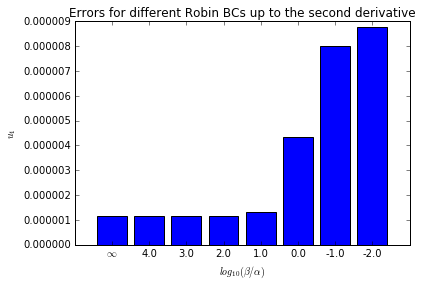

In [80]:
betas = np.array(errors2.keys())
errNorm = np.array(errors2.values())[:,0]
errBoundary = np.array(errors2.values())[:,1]

index = np.argsort(errNorm)

betaSort = []
errNormSort = []
errBoundarySort = []

for i in range(betas.size):
    j = index[i]
    betaSort = np.append(betaSort,betas[j])
    errNormSort = np.append(errNormSort,errNorm[j])
    errBoundarySort = np.append(errBoundarySort,errBoundary[j])

xaxis = np.zeros_like(betaSort)
print(float(betaSort[1]))
for i in range(xaxis.size):
    try:
        xaxis[i] = (np.log10(float(betaSort[i])))
    except :
        xaxis[i] = betaSort[i]
        pass
    
plt.bar(range(len(betaSort)), errNormSort, align='center')
plt.xticks(range(len(betaSort)), xaxis)
plt.xlabel(r'$log_{10}(\beta/\alpha)$')
plt.ylabel(r'$u_1$')
plt.title("Errors for different Robin BCs up to the second derivative")  

plt.savefig("figures/KdVTestCases/robinErrors2")
plt.show()

### Conclusions

As observed in the tests with Robin boundary conditions up to the first derivative of the solution, we obtained better results when the second derivative in the Robin formulation has a stronger influence.

In [81]:
errors2Zoom

{10.0: [1.3269341685726726e-06, 1.0565897871715188e-06],
 100.0: [1.1576647272041947e-06, 9.3041826235772487e-07],
 316.22776601683796: [1.1573815996276825e-06, 9.2998443509502351e-07],
 1000.0: [1.1572801764846458e-06, 9.2983259612517289e-07],
 3162.2776601683795: [1.1572468939838225e-06, 9.3037077281131768e-07],
 10000.0: [1.1572362475045576e-06, 9.3054221239044412e-07],
 31622.776601683792: [1.157232868607784e-06, 9.3059642697783981e-07],
 '$\\infty$': [1.1572313039712296e-06, 9.3062149998786e-07]}